# FDT Improvement Project

## Design Of Experiment

In [2]:
#!pip install NumPy
#!pip install SciPy
#!pip install pyDOE2
!python -m pip install -U pip
!python -m pip install -U matplotlib
# imports
#import pyDOE2
import itertools

levels = [2, 3, 2, 2, 2]  # Three factors with 2, 3 or 4 levels respectively.
reduction = 2       # Reduce the number of experiment to approximately a third.

#pyDOE2.gsd(levels, reduction)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/162.6 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.6 kB ? eta -:--:--
     ------------------- ------------------- 81.9/162.6 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 162.6/162.6 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/7.6 MB 19.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.4/7.6 MB 21.5 MB/s eta 0:00:01
   ------------------- -------------------- 3.8/7.6 MB 26.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.3/7.6 MB 28.3 MB/s eta 0:00:01
   ----------------------------------- ---- 6.8/7.6 MB 27.2 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.6 MB 28.8 MB/s eta 0:00:01
   ---

In [6]:
#Factors and Responses
Factor = {
    "inletCondition" : ["30psi", "65psi"],#check the parameters needed to set the pump at a set point,
                                        #or use a relieve valve (RV1a) to run the pump at a more constant speed
    "diaphragmChamberPressure(psi)" : ["sameAsInletPressure"],#, "50psiHigher"],# "maxAllowedPressure"],#--DV5 up to 250psi, DV5A up to 300psi
    #to keep the pressure constant in the diaphragm chamber, add a pressure regulator to the end of 
    #the manual pull valve
    "valveType" : ["DV5" , "DV5A"],# "DPV1"],#first run the DPV tests with qrs and make sure the fluid delivery time is 
    #correctly simulated by the software
    "valveSize(inch)" : [6 , 8],
    "airPressure(psi)" : [5, 25],#--electric electric can be from 15 to 65psi
    "inspectorsTestKFactor" : [17]#, 34]#--
}
Response = ['deliveryTime', 'operatingTime', 'delugeValveDischargeTime']

# 3 pumps 8 inch no 3600GPM 33PSI
# power to the pump (Hz)
# releif valve

In [7]:
#List of full factorial experiments
a = list(itertools.product(Factor['inletCondition'],Factor["diaphragmChamberPressure(psi)"],Factor['valveType'],Factor['valveSize(inch)'],Factor['airPressure(psi)'],Factor['inspectorsTestKFactor'], repeat = 1))
print(len(a))
for i in a:
    print(i)

16
('30psi', 'sameAsInletPressure', 'DV5', 6, 5, 17)
('30psi', 'sameAsInletPressure', 'DV5', 6, 25, 17)
('30psi', 'sameAsInletPressure', 'DV5', 8, 5, 17)
('30psi', 'sameAsInletPressure', 'DV5', 8, 25, 17)
('30psi', 'sameAsInletPressure', 'DV5A', 6, 5, 17)
('30psi', 'sameAsInletPressure', 'DV5A', 6, 25, 17)
('30psi', 'sameAsInletPressure', 'DV5A', 8, 5, 17)
('30psi', 'sameAsInletPressure', 'DV5A', 8, 25, 17)
('65psi', 'sameAsInletPressure', 'DV5', 6, 5, 17)
('65psi', 'sameAsInletPressure', 'DV5', 6, 25, 17)
('65psi', 'sameAsInletPressure', 'DV5', 8, 5, 17)
('65psi', 'sameAsInletPressure', 'DV5', 8, 25, 17)
('65psi', 'sameAsInletPressure', 'DV5A', 6, 5, 17)
('65psi', 'sameAsInletPressure', 'DV5A', 6, 25, 17)
('65psi', 'sameAsInletPressure', 'DV5A', 8, 5, 17)
('65psi', 'sameAsInletPressure', 'DV5A', 8, 25, 17)


## Importing and plotting software data

In [3]:
# Read the information from the itermediate files
import matplotlib.pyplot as plt
import numpy as np
import os
tempDir = r"C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp"
# print(os.listdir(tempDir))
if (r"~Main_Results.tmp" in os.listdir(tempDir)):
    mainResults = open(tempDir+r"\~Main_Results.tmp")
    i = 0
    for line in mainResults:
#         print(line)
        if (i == 1):
            trip_time = float(line.split(' ')[-1])
        elif (i == 2):
            transit_time = float(line.split(' ')[-1])
        elif (i == 4):
            operating_time = float(line.split(' ')[-1])
        i += 1
        
times = [trip_time, transit_time, operating_time]
print('trip time = ', trip_time, ' transit time = ', transit_time, ' operating_time = ', operating_time)
dvOpening = r"C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp\~dvOpening.tmp"   
DPVD = False
if (r"~dvOpening.tmp" in os.listdir(tempDir) and os.stat(dvOpening).st_size > 2000):
    dvData = np.genfromtxt(dvOpening, dtype=None, skip_header=2, names = ('time', 'dv_radius', 'velocity', 'P', 'Vol'))
    DPVD = True

# print(os.stat(dvOpening).st_size)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
for f in os.listdir(tempDir):
    if('Plot' in f):
        pvData = np.genfromtxt(tempDir + '\\'+f, dtype = None, delimiter =',', names = ('time', 'flow', 'P'))
        maxFlow = pvData['flow'].max()
        maxPressure = pvData['P'].max()
        #plt.plot(pvData['time'],pvData['flow'], label = f.split(' ')[2][:-4] + ' flow', linewidth = 3)
        ax1.plot(pvData['time'],pvData['P'], label = f.split(' ')[2][:-4], linewidth = 3)

ax1.axvline(x = trip_time )
ax1.axvline(x = transit_time)
ax1.axvline(x = operating_time)
ax1.grid()
ax1.legend()
ax1.set_ylabel('Pressure (psi)')
# plt.setp(ax1, xticklabels=[0,5,10,15,20,25,30,35,40])
#ax1.xlim([0,maxTime])

ax2 = fig.add_subplot(312,sharex=ax1)
for f in os.listdir(tempDir):
#     print(f)
    if('Plot' in f):
        pvData = np.genfromtxt(tempDir + '\\'+f, dtype = None, delimiter =',', names = ('time', 'flow', 'P'))
        maxFlow = pvData['flow'].max()
        maxPressure = pvData['P'].max()
        ax2.plot(pvData['time'],pvData['flow'], label = f.split(' ')[2][:-4], linewidth = 3)
        maxTime = pvData['time'].max()
        #plt.plot(pvData['time'],pvData['P'], label = f.split(' ')[2][:-4] + ' P', linewidth = 3)

ax2.grid()
ax2.legend()
ax2.axvline(x = trip_time )
ax2.axvline(x = transit_time)
ax2.axvline(x = operating_time)
ax2.set_ylabel('Flow (GPM)')
# plt.setp(ax2, xticklabels=[0,5,10,15,20,25,30,35,40])
# ax2.xlim([0,maxTime])



if(DPVD):
    ax3 = fig.add_subplot(313,sharex=ax1)
    ax3.plot(dvData['time'],dvData['dv_radius'], label='radius ', linewidth = 3)
    ax3.plot(dvData['time'],dvData['velocity'], label='velocity (m/s)', linewidth = 3)
    ax3.plot(dvData['time'],dvData['P'], label='Pressure (bar)', linewidth = 3)
    ax3.plot(dvData['time'],dvData['Vol'], label='Volume (l)', linewidth = 3)
    ax3.grid()
    # ax3.xlabel('Time (s)')
    ax3.legend()
    ax3.axvline(x = trip_time )
    ax3.axvline(x = transit_time)
    ax3.axvline(x = operating_time)
# plt.setp(ax3, xticklabels=[0,5,10,15,20,25,30,35,40])
plt.xlim([0,maxTime])
plt.xlabel('Time (s)')
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\jahmada\\AppData\\Roaming\\TycoFP\\SprinkCALC4\\Support\\Temp'

trip time =  4.01  transit time =  25.3744  operating_time =  25.4734


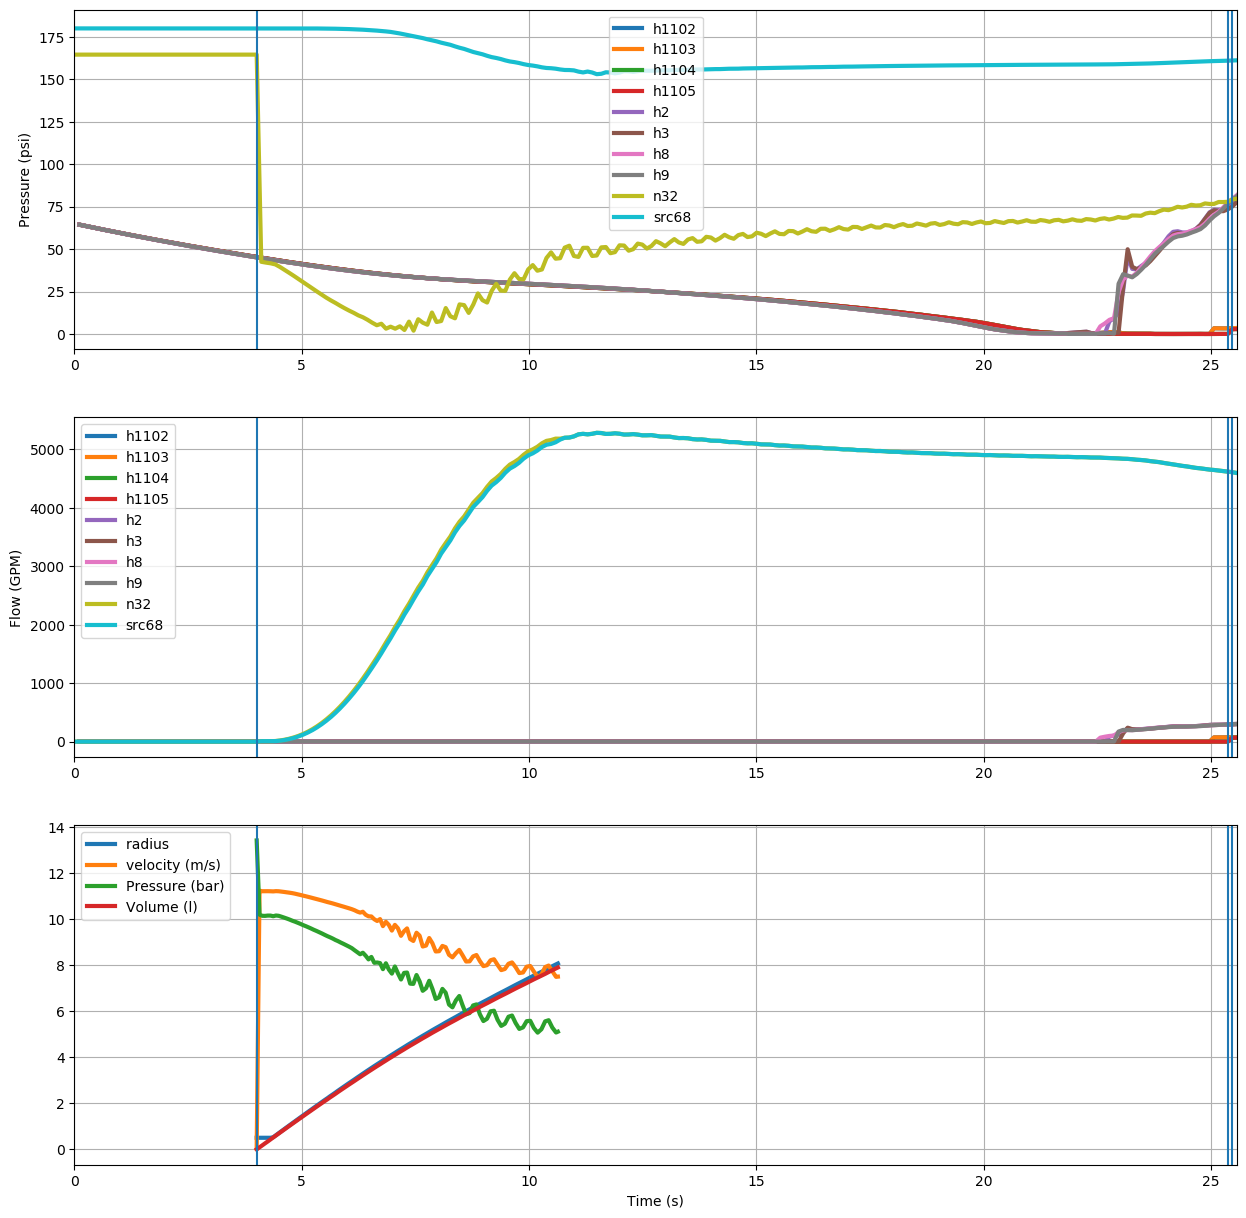

True


In [4]:
# Read the infomarion from the intermediate files and plot the results
import matplotlib.pyplot as plt
import numpy as np
import os
tempDir = r"C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp"
# print(os.listdir(tempDir))
if (r"~Main_Results.tmp" in os.listdir(tempDir)):
    mainResults = open(tempDir+r"\~Main_Results.tmp")
    i = 0
    for line in mainResults:
#         print(line)
        if (i == 1):
            trip_time = float(line.split(' ')[-1])
        elif (i == 2):
            transit_time = float(line.split(' ')[-1])
        elif (i == 4):
            operating_time = float(line.split(' ')[-1])
        i += 1
        
times = [trip_time, transit_time, operating_time]
print('trip time = ', trip_time, ' transit time = ', transit_time, ' operating_time = ', operating_time)
dvOpening = r"C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp\~dvOpening.tmp"   
DPVD = False
if (r"~dvOpening.tmp" in os.listdir(tempDir) and os.stat(dvOpening).st_size > 1500):
    dvData = np.genfromtxt(dvOpening, dtype=None, skip_header=2, names = ('time', 'dv_radius', 'velocity', 'P', 'Vol'))
    DPVD = True

# print(os.stat(dvOpening).st_size)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
for f in os.listdir(tempDir):
    if('Plot' in f):
        pvData = np.genfromtxt(tempDir + '\\'+f, dtype = None, delimiter =',', names = ('time', 'flow', 'P'))
        maxFlow = pvData['flow'].max()
        maxPressure = pvData['P'].max()
        #plt.plot(pvData['time'],pvData['flow'], label = f.split(' ')[2][:-4] + ' flow', linewidth = 3)
        ax1.plot(pvData['time'],pvData['P'], label = f.split(' ')[2][:-4], linewidth = 3)

ax1.axvline(x = trip_time )
ax1.axvline(x = transit_time)
ax1.axvline(x = operating_time)
ax1.grid()
ax1.legend()
ax1.set_ylabel('Pressure (psi)')
# plt.setp(ax1, xticklabels=[0,5,10,15,20,25,30,35,40])
#ax1.xlim([0,maxTime])

ax2 = fig.add_subplot(312,sharex=ax1)
for f in os.listdir(tempDir):
#     print(f)
    if('Plot' in f):
        pvData = np.genfromtxt(tempDir + '\\'+f, dtype = None, delimiter =',', names = ('time', 'flow', 'P'))
        maxFlow = pvData['flow'].max()
        maxPressure = pvData['P'].max()
        ax2.plot(pvData['time'],pvData['flow'], label = f.split(' ')[2][:-4], linewidth = 3)
        maxTime = pvData['time'].max()
        #plt.plot(pvData['time'],pvData['P'], label = f.split(' ')[2][:-4] + ' P', linewidth = 3)

ax2.grid()
ax2.legend()
ax2.axvline(x = trip_time )
ax2.axvline(x = transit_time)
ax2.axvline(x = operating_time)
ax2.set_ylabel('Flow (GPM)')
# plt.setp(ax2, xticklabels=[0,5,10,15,20,25,30,35,40])
# ax2.xlim([0,maxTime])



if(DPVD):
    ax3 = fig.add_subplot(313,sharex=ax1)
    ax3.plot(dvData['time'],dvData['dv_radius'], label='radius ', linewidth = 3)
    ax3.plot(dvData['time'],dvData['velocity'], label='velocity (m/s)', linewidth = 3)
    ax3.plot(dvData['time'],dvData['P'], label='Pressure (bar)', linewidth = 3)
    ax3.plot(dvData['time'],dvData['Vol'], label='Volume (l)', linewidth = 3)
    ax3.grid()
    # ax3.xlabel('Time (s)')
    ax3.legend()
    ax3.axvline(x = trip_time )
    ax3.axvline(x = transit_time)
    ax3.axvline(x = operating_time)
# plt.setp(ax3, xticklabels=[0,5,10,15,20,25,30,35,40])
plt.xlim([0,maxTime])
plt.xlabel('Time (s)')
plt.show()
print(DPVD)

[1081.5783000000001, 1844.8405411764713, 2834.94552, 3757.1417529411765, 4430.012693333333, 4952.018225000002]


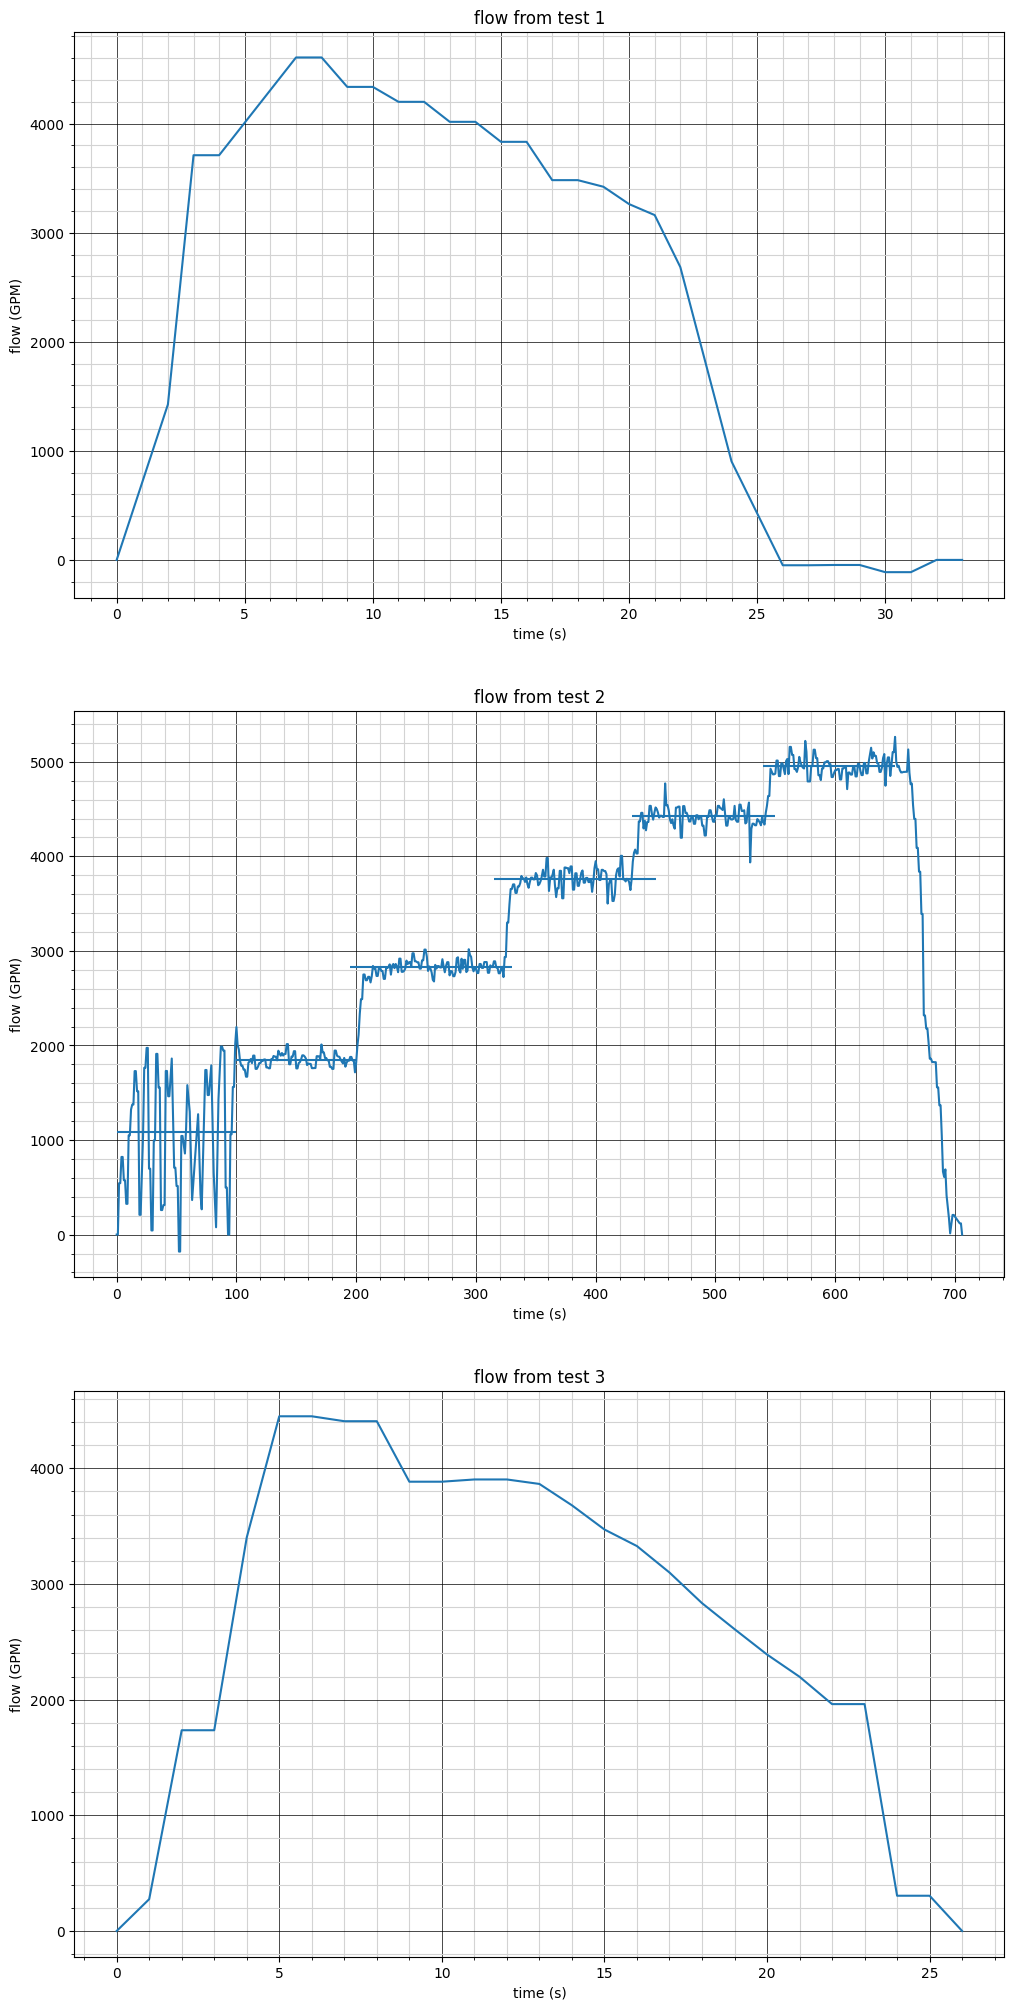

In [5]:
#corrected data from the ultrasonic flow meter (increased by 10% to match the calibrated nozzle flow measurements)
flowFiles = ['./AhernStudy1/Dec17th2019TurlockTest1/FlowMeter2.csv',
             './AhernStudy1/Dec17th2019TurlockTest2/flowMeter.csv',
             './AhernStudy1/Dec17th2019TurlockTest3/flowMeter.csv']

import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = (12, 25)
plt.rcParams.update({'font.size': 10})
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = (12, 25)
plt.rcParams.update({'font.size': 10})
flowTime = np.zeros((3,700))
flows = np.zeros((3,700))
fig, axs = plt.subplots(3,1)
for i in [0,1,2]:
    time = np.zeros(1000)
    flow = np.zeros(1000)
    with open(flowFiles[i], encoding='utf-8-sig') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        line_count = 0
        initial = 0
        final = 0
        initialSwitch = True
        finalSwitch = True
        for row in csv_reader:
            #print(row[0], row[1])
            #time.append(float(row[0]))
            time[line_count] = float(row[0])
            flow[line_count] = float(row[1])
            line_count += 1
        #plt.plot(time[0:line_count],flow[0:line_count])
        axs[i].set_xlabel('time (s)')
        axs[i].set_ylabel('flow (GPM)')
        axs[i].grid(True)
        #axs[i].plot(time[0:line_count],flow[0:line_count])#, label = labels[i])
        flows[i][0:line_count]=flow[0:line_count]*1.1
        flowTime[i][0:line_count]=time[0:line_count]
        axs[i].plot(flowTime[i][0:line_count],flows[i][0:line_count])#, label = labels[i])
        axs[i].grid(True, which='major', linestyle='-', linewidth='0.5', color='black', axis='both')
        axs[i].grid(True, which='minor', linestyle='-', color='lightgray', axis='both')
        axs[i].minorticks_on()
        if i == 1:
            axs[i].hlines(y=flows[1][10:80].mean(),xmin=0,xmax=100)
            axs[i].hlines(y=flows[1][90:175].mean(),xmin=100,xmax=200)
            axs[i].hlines(y=flows[1][195:295].mean(),xmin=195,xmax=330)
            axs[i].hlines(y=flows[1][315:400].mean(),xmin=315,xmax=450)
            axs[i].hlines(y=flows[1][430:505].mean(),xmin=430,xmax=550)
            axs[i].hlines(y=flows[1][540:620].mean(),xmin=540,xmax=650)
        #axs[i].legend()
        axs[i].set_title('flow from test '+str(i+1))

#print("{0:8.2f},{1:8.2f},{2:8.2f},{3:8.2f},{4:8.2f}".format(1.1*flows[1][10:80].mean(),1.1*flows[1][90:175].mean(),1.1*flows[1][195:295].mean(),1.1*flows[1][315:400].mean(),1.1*flows[1][430:505].mean(),1.1*flows[1][540:620].mean()))
pumpCurveFlow = [flows[1][10:80].mean(),flows[1][90:175].mean(),flows[1][195:295].mean(),flows[1][315:400].mean(),flows[1][430:505].mean(),flows[1][540:620].mean()]
print(pumpCurveFlow)
plt.show()

In [6]:
#First test at Turlock, trip test with 4 sprinklers

# test4Files = ['../../FDT_Ahern/AhernStudy1/Dec17th2019TurlockTest1/E0/test4.CSV',
#               '../../FDT_Ahern/AhernStudy1/Dec17th2019TurlockTest1/E1/test4.CSV',
#               '../../FDT_Ahern/AhernStudy1/Dec17th2019TurlockTest1/E2/test4.CSV',
#               '../../FDT_Ahern/AhernStudy1/Dec17th2019TurlockTest1/E3/test4.CSV',
#               '../../FDT_Ahern/AhernStudy1/Dec17th2019TurlockTest1/E4/test4.CSV',
#               '../../FDT_Ahern/AhernStudy1/Dec17th2019TurlockTest1/E5/test4.CSV']

test4Files = ['./AhernStudy1/Dec17th2019TurlockTest1/E0/test4.CSV',#pump
              './AhernStudy1/Dec17th2019TurlockTest1/E1/test4.CSV',#DV
#               './AhernStudy1/Dec17th2019TurlockTest1/E2/test4.CSV',#CM
#               './AhernStudy1/Dec17th2019TurlockTest1/E3/test4.CSV',#CM
#               './AhernStudy1/Dec17th2019TurlockTest1/E4/test4.CSV',#K34
              './AhernStudy1/Dec17th2019TurlockTest1/E5/test4.CSV']#IP

def convertToPsi(rawVal):
    pressure = float(rawVal) - 406.0
    pressure *= 0.092336
    return pressure

dvData['P'] = dvData['P']*14.5038

import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = (12, 25)
plt.rcParams.update({'font.size': 10})

labels = ['Pump','Deluge','IP']
initialTime = 1576601591
finalTime = 1576601627
smallestStart = 2000000000
largestFinish = 0
Unit_Pressure = np.zeros((6*3,20*(finalTime-initialTime)+1))


fig, axs = plt.subplots(3,1)
for i in range(len(test4Files)):
    time = np.zeros(50000)
    p0 = np.zeros(50000)
    p1 = np.zeros(50000)
    p2 = np.zeros(50000)
    #print(pressure)
    with open(test4Files[i]) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        line_count = 0
        initial = 0
        final = 0
        initialSwitch = True
        finalSwitch = True
        for row in csv_reader:
            #print(row[0], row[1], row[2])
            #time.append(float(row[0]))
            time[line_count] = float(row[0])
            p0[line_count] = int(row[1])
            p1[line_count] = int(row[2])
            p2[line_count] = int(row[3])
            if time[line_count] > initialTime and initialSwitch:
                initial = line_count
                initialSwitch = False
            if finalTime < time[line_count] and finalSwitch:
                final = line_count
                finalSwitch = False
            if line_count == 0:
                #print("initial time = " + str(time[line_count]))
                if time[line_count]<smallestStart:
                    smallestStart = time[line_count]
            line_count += 1
        #final = line_count
        #print("final line_count = " + str(line_count))
        #print("final time = " + str(time[line_count-1]))
        if time[line_count-1]>largestFinish:
            largestFinish = time[line_count-1]
        if i == 0:
            initialTime = time[initial]
        #plt.subplot(3,1,1)
        #plt.title('P0')
        
        axs[0].set_xlabel('time (s)')
        axs[0].set_ylabel('pressure (psi)')
        axs[0].grid(True, which='major', linestyle='-', linewidth='0.5', color='black', axis='both')
        axs[0].grid(True, which='minor', linestyle='-', color='lightgray', axis='both')
        axs[0].minorticks_on()
#         if i in [1]:#DV
#             axs[0].plot(time[initial:final]-initialTime,(p0[initial:final]-406.0)*0.092336, label = labels[i]+"P0")
        if i in [0,1,2]:
            axs[0].plot(time[initial:final]-initialTime,(p1[initial:final]-406.0)*0.092336, label = labels[i]+"P1")
        if i == 1:
            axs[0].plot(time[initial:final]-initialTime,(p2[initial:final]-406.0)*0.092336, label = labels[i]+"P2")
#         if i == 2:
#             axs[0].plot(flowTime[0]+5.5,flows[0]/20,label='flow/20')
        axs[0].legend()
        axs[0].set_title('Comparison between FDT and experiments')
        
#         axs[1].set_title('FDT vs. experiment')
#         axs[1].set_xlabel('time (s)')
#         axs[1].set_ylabel('Pressure(psi) and Flow(gpm)')
#         axs[1].grid(True, which='major', linestyle='-', linewidth='0.5', color='black', axis='both')
#         axs[1].grid(True, which='minor', linestyle='-', color='lightgray', axis='both')
#         axs[1].minorticks_on()
#         if i in [1]:
#             axs[1].plot(time[initial:final]-initialTime,(p0[initial:final]-406.0)*0.092336, label = labels[i]+"P0")
#         if i in [0,5]:
#             axs[1].plot(time[initial:final]-initialTime,(p1[initial:final]-406.0)*0.092336, label = labels[i]+"P1")
#         if i == 1:
#             pass
#             #axs[4].plot(time[initial:final]-initialTime,(p2[initial:final]-406.0)*0.092336, label = labels[i]+"P2")
#         if i == 2:
#             axs[1].plot(flowTime[0]+5.5,flows[0]/20,label='flow/20')
#             axs[1].plot(timeFDT+0.5, pumpFDT, label = 'pump-FDT', linestyle = '-.')
#             axs[1].plot(timeFDT+0.5, valveFDT, label = 'DV5-FDT', linestyle = '-.')
#             axs[1].plot(timeFDT+0.5, flowFDT/20, label = 'flow-FDT/20', linestyle = '-.')
#         axs[1].legend()
#         
#         axs[2].set_title('Pressure drop across the DV5')
#         axs[2].set_xlabel('time (s)')
#         axs[2].set_ylabel('Pressure drop(psi)')
#         axs[2].grid(True, which='major', linestyle='-', linewidth='0.5', color='black', axis='both')
#         axs[2].grid(True, which='minor', linestyle='-', color='lightgray', axis='both')
#         axs[2].minorticks_on()
#         if i == 1:
#             #axs[5].plot(time[initial:final-15]-initialTime,(p1[initial:final-15]-406.0)*0.092336, label = labels[i]+"P2")
#             axs[2].plot(time[initial:final-15]-initialTime, (p0[initial:final-15]-406.0)*0.092336-(p2[initial:final-15]-406.0)*0.092336, label='DV5-dP')
#         axs[2].legend()
axs[0].plot(dvData['time'],dvData['P'], label='Diaph-P FDT', linewidth = 3)
import os
tempDir = r"C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp"
#        # print(os.listdir(tempDir))
if (r"~Main_Results.tmp" in os.listdir(tempDir)):
    mainResults = open(tempDir+r"\~Main_Results.tmp")
    i = 0
    for line in mainResults:
        print(line)
        if (i == 1):
            trip_time = float(line.split(' ')[-1])
        elif (i == 2):
            transit_time = float(line.split(' ')[-1])
        elif (i == 4):
            operating_time = float(line.split(' ')[-1])
        i += 1

times = [trip_time, transit_time, operating_time]
print('trip time = ', trip_time, ' transit time = ', transit_time, ' operating_time = ', operating_time)
dvOpening = r"C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp\~dvOpening.tmp"   
DPVD = False
if (r"~dvOpening.tmp" in os.listdir(tempDir) and os.stat(dvOpening).st_size > 1500):
    dvData = np.genfromtxt(dvOpening, dtype=None, skip_header=2, names = ('time', 'dv_radius', 'velocity', 'P', 'Vol'))
    DPVD = True

        # print(os.stat(dvOpening).st_size)
#         fig = plt.figure(figsize=(15,15))
#         axs[1] = fig.add_subplot(311)
plotThese={'h1102FDT':'head-FDT','n32FDT':'n32-DPVD-FDT','src68FDT':'Pump-FDT'}
for f in os.listdir(tempDir):
    if('Plot' in f):
        pvData = np.genfromtxt(tempDir + '\\'+f, dtype = None, delimiter =',', names = ('time', 'flow', 'P'))
        maxFlow = pvData['flow'].max()
        maxPressure = pvData['P'].max()
        #plt.plot(pvData['time'],pvData['flow'], label = f.split(' ')[2][:-4] + ' flow', linewidth = 3)
        label = f.split(' ')[2][:-4]+'FDT'
        if label in plotThese.keys():
            axs[0].plot(pvData['time'],pvData['P'], label = plotThese[label], linewidth = 3, linestyle = '-.')

axs[0].axvline(x = trip_time )
axs[0].axvline(x = transit_time)
axs[0].axvline(x = operating_time)
axs[0].grid()
axs[0].legend()
#         axs[1].set_ylabel('Pressure (psi)')
        # plt.setp(ax1, xticklabels=[0,5,10,15,20,25,30,35,40])
        #ax1.xlim([0,maxTime])

#         ax2 = fig.add_subplot(312,sharex=ax1)
#         for f in os.listdir(tempDir):
        #     print(f)
#             if('Plot' in f):
#                 pvData = np.genfromtxt(tempDir + '\\'+f, dtype = None, delimiter =',', names = ('time', 'flow', 'P'))
#                 maxFlow = pvData['flow'].max()
#                 maxPressure = pvData['P'].max()
#                 axs[2].plot(pvData['time'],pvData['flow'], label = f.split(' ')[2][:-4], linewidth = 3)
#                 maxTime = pvData['time'].max()
#                 #plt.plot(pvData['time'],pvData['P'], label = f.split(' ')[2][:-4] + ' P', linewidth = 3)

#         axs[2].grid()
#         axs[2].legend()
#         axs[2].axvline(x = trip_time )
#         axs[2].axvline(x = transit_time)
#         axs[2].axvline(x = operating_time)
#         axs[2].set_ylabel('Flow (GPM)')
        # plt.setp(ax2, xticklabels=[0,5,10,15,20,25,30,35,40])
        # ax2.xlim([0,maxTime])



#         if(DPVD):
#             ax3 = fig.add_subplot(313,sharex=ax1)
#             ax3.plot(dvData['time'],dvData['dv_radius'], label='radius ', linewidth = 3)
#             ax3.plot(dvData['time'],dvData['velocity'], label='velocity (m/s)', linewidth = 3)
#             ax3.plot(dvData['time'],dvData['P'], label='Pressure (bar)', linewidth = 3)
#             ax3.plot(dvData['time'],dvData['Vol'], label='Volume (l)', linewidth = 3)
#             ax3.grid()
#             # ax3.xlabel('Time (s)')
#             ax3.legend()
#             ax3.axvline(x = trip_time )
#             ax3.axvline(x = transit_time)
#             ax3.axvline(x = operating_time)
    
##############################################
#plt.xticks(np.linspace(0,21,22))
#plt.yticks(np.linspace(0,float(max(pressure)),16))
print("initially, change the initialTime and finalTime to these values:")
print("smallest start time = " + str(smallestStart))
print("largest final time = " + str(largestFinish))
plt.savefig("firstTripTest.pdf")
plt.show()

NameError: name 'dvData' is not defined

In [8]:
# imports
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 16.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.5 MB 21.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.5 MB 22.8 MB/s eta 0:00:01
   ------------------- -------------------- 5.6/11.5 MB 25.5 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.5 MB 25.7 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.5 MB 26.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.8/11.5 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------  11.2/11.5 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 27.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/505.5 kB ? eta -:--:--


In [ ]:
# ~DelugeValve.tmp contents

 
# read all lines at once
count = 1
with open(r'C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp\~DelugeValve.tmp',mode='r') as f:
    if(f.readline()[0] == '1'):
        for line in f:
            print(str(count) + ' -> ' + line)
            if(count == 4):
                if (float(line) == 0):
                    print("ERROR!!! the trim diameter is zero!!!")
            if(count == 5):
                num = int(line)
            if(count == 6):
                trimCurve = line
            count+=1

if (count > 5):#plot only if DPV-D
    ar = trimCurve.split(' ')
    dp = []
    flow = []
    for i in range(0,2*num,2):
        flow.append(ar[i])
        dp.append(ar[i+1])
    plt.plot(flow,dp)
    plt.title('Pressure drop curve of valves trim')
    plt.xlabel('flow ($m^3 / s$)')
    plt.ylabel('$\Delta P (Pa)$')
    plt.grid()
    plt.show()

In [9]:
dist, numSamples = [], 1000
mean = 0
std = 100
for i in range(numSamples):
    dist.append(random.gauss(mean,std))
    #dist.append(np.random.normal(mean, std))
print(dist[:5])

[170.12144293713746, -10.852049423813014, -11.925515936833284, -89.19862911975525, 10.140153919380692]


In [ ]:
# ~Pipes.tmp contents
file = open(r'C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp\~Pipes.tmp',mode='r')
 
# read all lines at once
all_of_it = file.read()
 
# close the file
file.close()
print(all_of_it)

In [ ]:
# ~Nodes.tmp contents
file = open(r'C:\Users\jahmada\AppData\Roaming\TycoFP\SprinkCALC4\Support\Temp\~Nodes.tmp',mode='r')
 
# read all lines at once
all_of_it = file.read()
 
# close the file
file.close()
print(all_of_it)
cols = ['id','type','x','y','z','open/close','open time','orifice size(m)','k-factor*0.759806','6894.7572931783E-5*OperatingPressure']

In [10]:
pd.__version__

'2.2.1'

In [11]:
# pd.show_versions()

In [12]:
%matplotlib inline

# First Test
For this test the DV5 was open but the solenoid was closed.

In [13]:
df = pd.read_csv('FDTDrySystemQuantifying50psiInternal1.csv')
df.set_index('t', inplace=True)
df.head()

Flowmeter  Flowmeter Pressure  Sprinkler Outlet Pressure  \
t                                                               
0.0      147.1                75.0                       66.2   
0.1      148.4                75.1                       66.1   
0.2      149.7                75.1                       66.0   
0.3      150.4                75.1                       65.9   
0.4      149.7                75.1                       66.0   

     Diaphragm Pressure  Valve Outlet  Valve Inlet  Voltage In Channel 1  \
t                                                                          
0.0                40.9          70.1         70.8                   0.1   
0.1                40.9          70.2         71.1                   0.1   
0.2                41.0          70.3         71.3                   0.1   
0.3                41.1          70.4         71.3                   0.1   
0.4                41.1          70.5         71.3                   0.1   

     Voltage In Channel 2  
t                          
0.0                   0.0  
0.1                   0.0  
0.2                   0.0  
0.3                   0.0  
0.4                   0.0

In [14]:
df.columns

Index(['Flowmeter', 'Flowmeter Pressure', 'Sprinkler Outlet Pressure',
       'Diaphragm Pressure', 'Valve Outlet', 'Valve Inlet',
       'Voltage In Channel 1', 'Voltage In Channel 2'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0.0 to 149.9
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Flowmeter                  1500 non-null   float64
 1   Flowmeter Pressure         1500 non-null   float64
 2   Sprinkler Outlet Pressure  1500 non-null   float64
 3   Diaphragm Pressure         1500 non-null   float64
 4   Valve Outlet               1500 non-null   float64
 5   Valve Inlet                1500 non-null   float64
 6   Voltage In Channel 1       1500 non-null   float64
 7   Voltage In Channel 2       1500 non-null   float64
dtypes: float64(8)
memory usage: 105.5 KB


In [16]:
df[['Flowmeter','Flowmeter Pressure','Valve Inlet','Diaphragm Pressure','Valve Outlet','Sprinkler Outlet Pressure']][100:130].describe()

Flowmeter  Flowmeter Pressure  Valve Inlet  Diaphragm Pressure  \
count  301.000000          301.000000   301.000000          301.000000   
mean   111.787708           56.477076    52.572757           33.560133   
std      1.550016            0.545563     0.493412            0.237498   
min    108.000000           55.700000    51.900000           33.000000   
25%    110.600000           56.000000    52.200000           33.400000   
50%    111.700000           56.400000    52.500000           33.500000   
75%    112.800000           56.800000    52.900000           33.700000   
max    115.800000           58.000000    54.000000           34.300000   

       Valve Outlet  Sprinkler Outlet Pressure  
count    301.000000                 301.000000  
mean      51.737874                  49.354817  
std        0.472399                   0.574762  
min       51.000000                  48.500000  
25%       51.300000                  48.900000  
50%       51.700000                  49.200000  
75%       52.000000                  49.600000  
max       53.200000                  51.000000

Flowmeter Pressure  Valve Inlet  Diaphragm Pressure  Valve Outlet  \
count          101.000000   101.000000           101.00000    101.000000   
mean            56.005941    52.176238            33.39703     51.341584   
std              0.200410     0.216402             0.13961      0.205556   
min             55.700000    51.900000            33.00000     51.000000   
25%             55.900000    52.000000            33.30000     51.200000   
50%             56.000000    52.100000            33.40000     51.300000   
75%             56.100000    52.300000            33.50000     51.500000   
max             56.800000    52.800000            33.70000     51.900000   

       Sprinkler Outlet Pressure  
count                 101.000000  
mean                   48.818812  
std                     0.165960  
min                    48.500000  
25%                    48.700000  
50%                    48.800000  
75%                    49.000000  
max                    49.200000

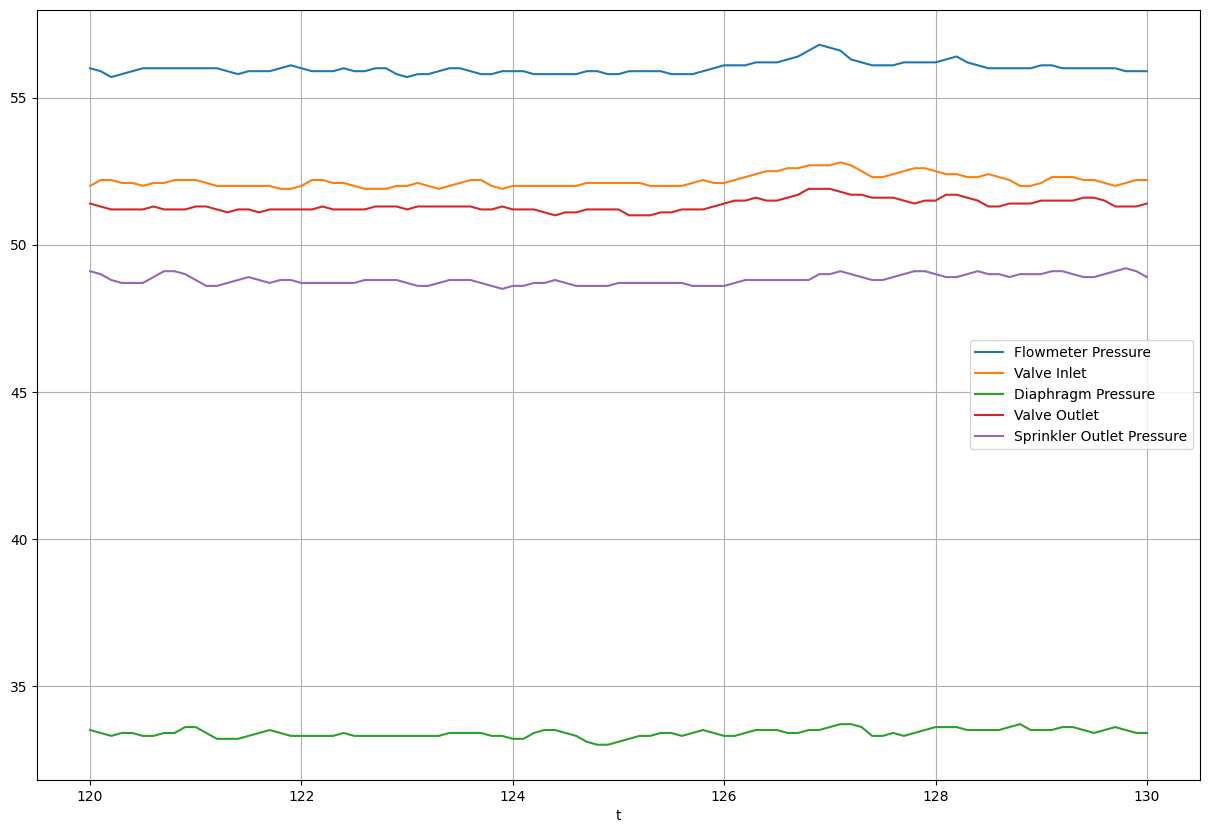

In [17]:
df[['Flowmeter Pressure','Valve Inlet','Diaphragm Pressure','Valve Outlet','Sprinkler Outlet Pressure']][120:130].plot(grid='on', figsize = (15,10))
df[['Flowmeter Pressure','Valve Inlet','Diaphragm Pressure','Valve Outlet','Sprinkler Outlet Pressure']][120:130].describe()

count    101.000000
mean     112.082178
std        1.503622
min      108.300000
25%      110.900000
50%      111.900000
75%      113.200000
max      115.400000
Name: Flowmeter, dtype: float64

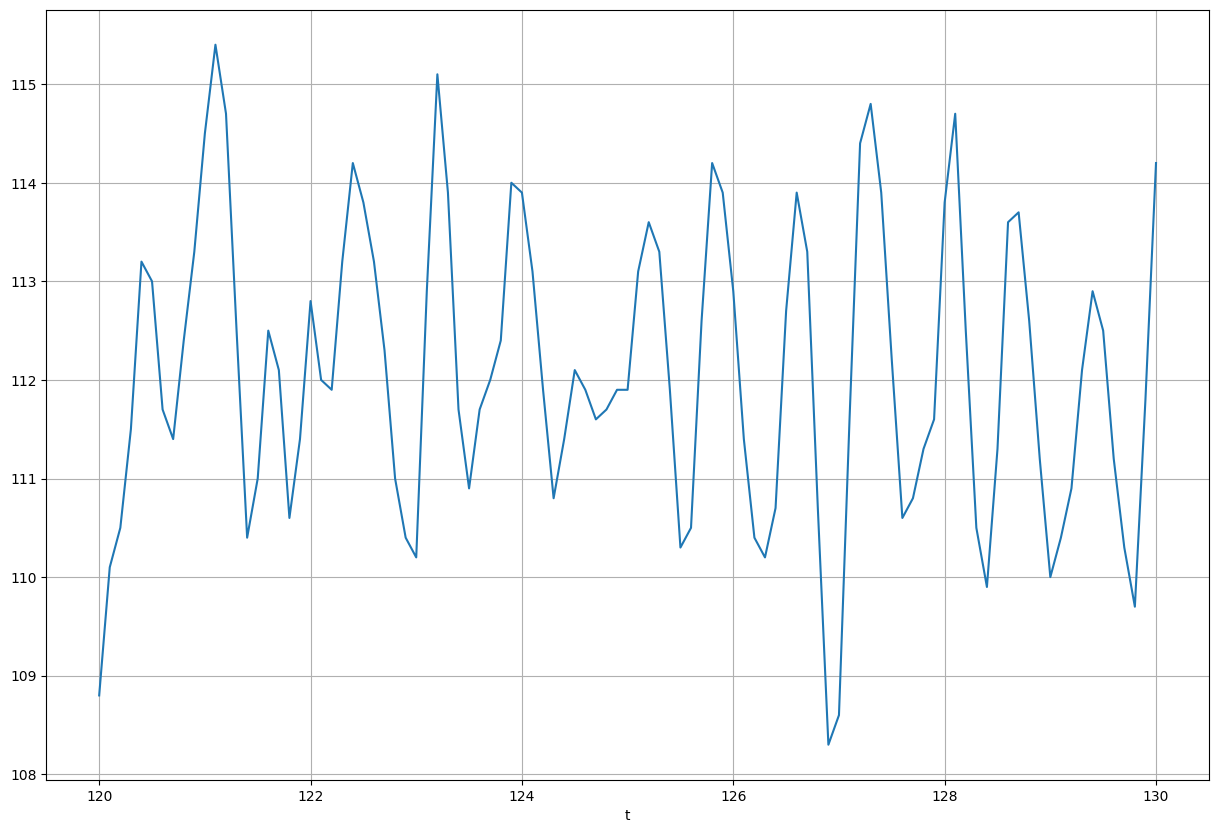

In [18]:
df['Flowmeter'][120:130].plot(grid= 'on', figsize = (15,10))
df['Flowmeter'][120:130].describe()

# Second test
for this test a 4inch pump was used in auto mode.

In [19]:
df4 = pd.read_csv('FDTDrySystemQuantifying50psiInternal4.csv')
df4.set_index('t', inplace=True)
df4[['Flowmeter','Diaphragm Pressure','Sprinkler Outlet','Valve Inlet','Flowmeter Pressure','Valve Outlet']].head()

Flowmeter  Diaphragm Pressure  Sprinkler Outlet  Valve Inlet  \
t                                                                   
0.0        6.3                54.3               0.3         43.0   
0.0        6.2                54.3               0.3         43.0   
0.0        6.2                54.3               0.3         42.9   
0.0        6.2                54.3               0.3         42.9   
0.0        6.1                54.3               0.3         42.9   

     Flowmeter Pressure  Valve Outlet  
t                                      
0.0                53.9           0.9  
0.0                53.9           0.9  
0.0                54.0           0.9  
0.0                54.0           0.9  
0.0                54.0           0.9

In [20]:
df4[['Flowmeter','Flowmeter Pressure','Valve Inlet','Diaphragm Pressure','Valve Outlet','Sprinkler Outlet']].describe()

Flowmeter  Flowmeter Pressure   Valve Inlet  Diaphragm Pressure  \
count  23400.00000        23400.000000  23400.000000        23400.000000   
mean     124.77906           37.982282     36.037256           17.859158   
std       89.22404           23.256884     22.367394           27.112500   
min        5.30000            6.900000      6.500000            0.300000   
25%        8.80000            7.500000      7.200000            0.500000   
50%      119.30000           53.300000     43.000000            0.600000   
75%      226.30000           55.700000     55.400000           54.100000   
max      241.90000           67.700000     67.200000           71.100000   

       Valve Outlet  Sprinkler Outlet  
count  23400.000000      23400.000000  
mean      19.295235         17.666329  
std       24.325358         23.164671  
min        0.600000          0.200000  
25%        0.900000          0.400000  
50%        1.600000          0.500000  
75%       52.100000         48.600000  
max       61.000000         57.300000

<Axes: xlabel='t'>

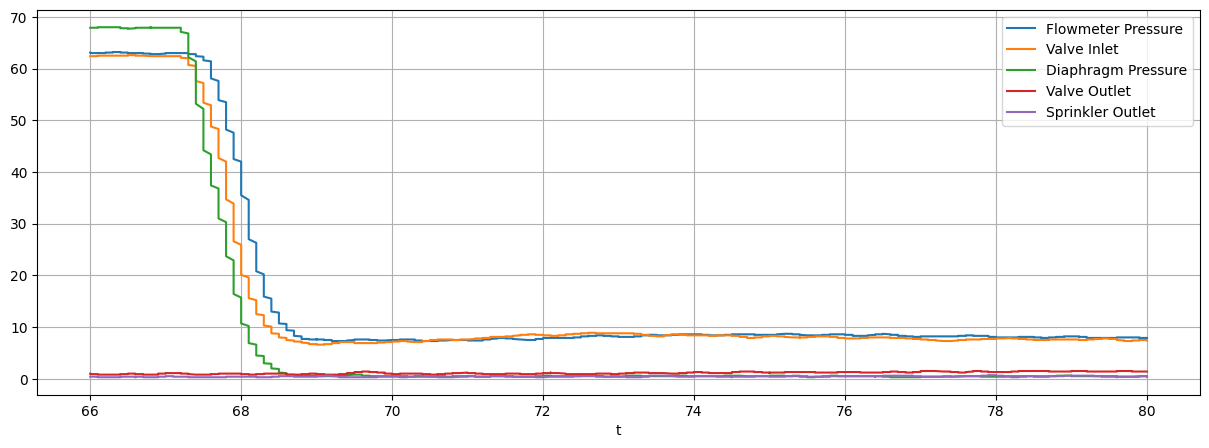

In [21]:
df4[['Flowmeter Pressure','Valve Inlet','Diaphragm Pressure','Valve Outlet','Sprinkler Outlet']][66:80].plot(grid='on', figsize = (15,5))

<Axes: xlabel='t'>

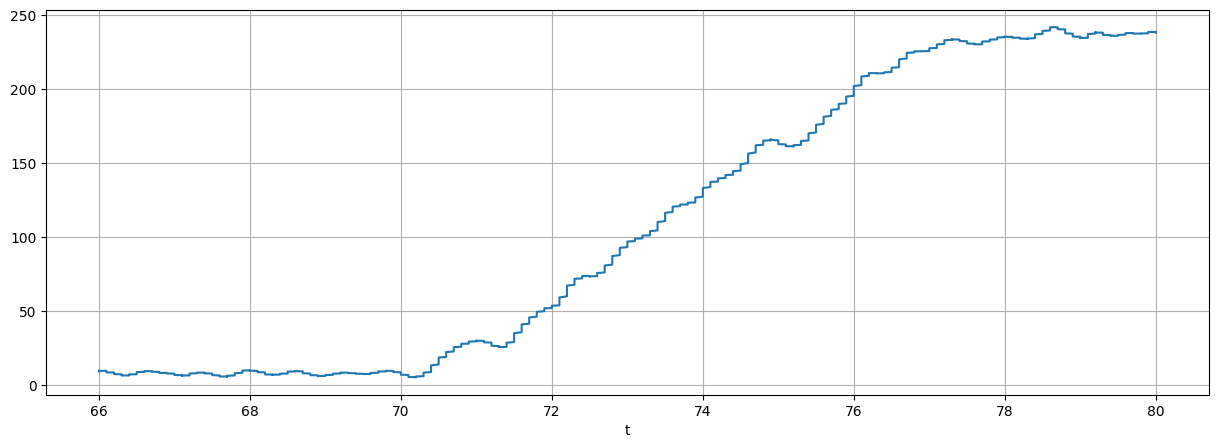

In [22]:
df4['Flowmeter'][66:80].plot(grid= 'on', figsize = (15,5))

# Third Test

In [23]:
#
df2 = pd.read_csv('FDTDrySystemQuantifying30psiInternal1.csv')
df2.set_index('t', inplace=True)
#df2[['Flowmeter','Diaphragm Pressure','Sprinkler Outlet','Valve Inlet Pressure','Flowmeter Pressure','Valve Outlet Pressure']].head()

In [24]:
# df2[['Flowmeter','Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']].describe()

<Axes: xlabel='t'>

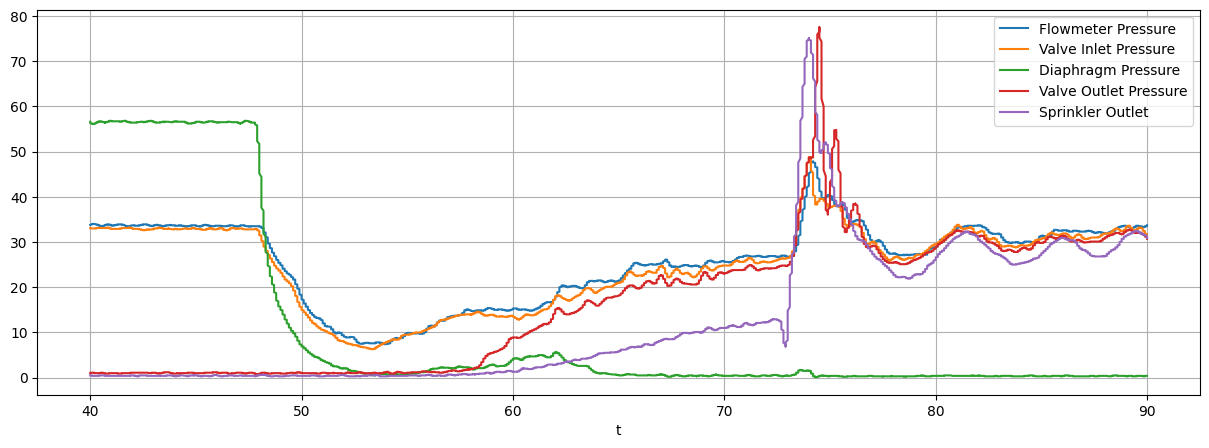

In [25]:
df2[['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']][40:90].plot(grid='on', figsize = (15,5))

<Axes: xlabel='t'>

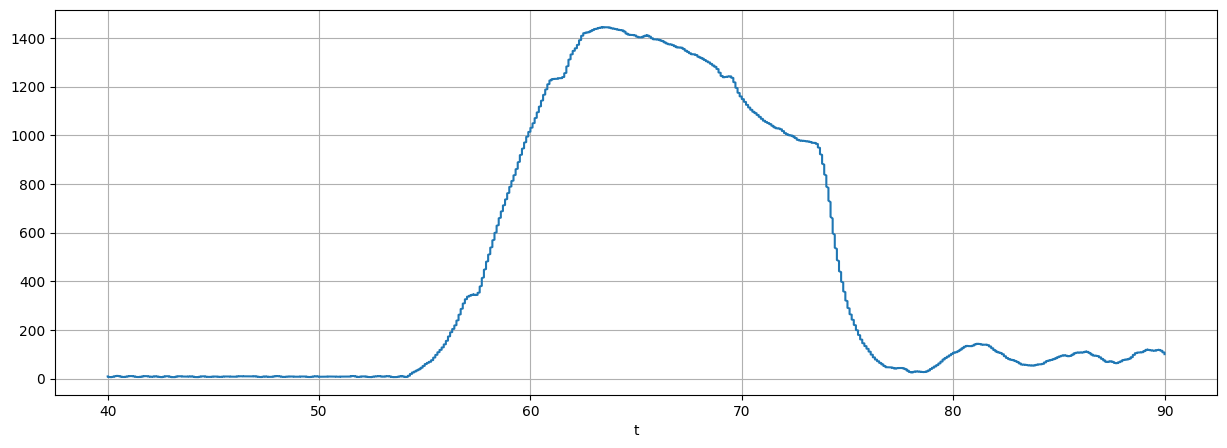

In [26]:
df2['Flowmeter'][40:90].plot(grid= 'on', figsize = (15,5))

# Forth Test

In [27]:
#
df3 = pd.read_csv('FDTDrySystemQuantifying60psiInternal1.csv')
df3.set_index('t', inplace=True)
#df3[['Flowmeter','Diaphragm Pressure','Sprinkler Outlet','Valve Inlet Pressure','Flowmeter Pressure','Valve Outlet Pressure']][45:80].head()

<Axes: xlabel='t'>

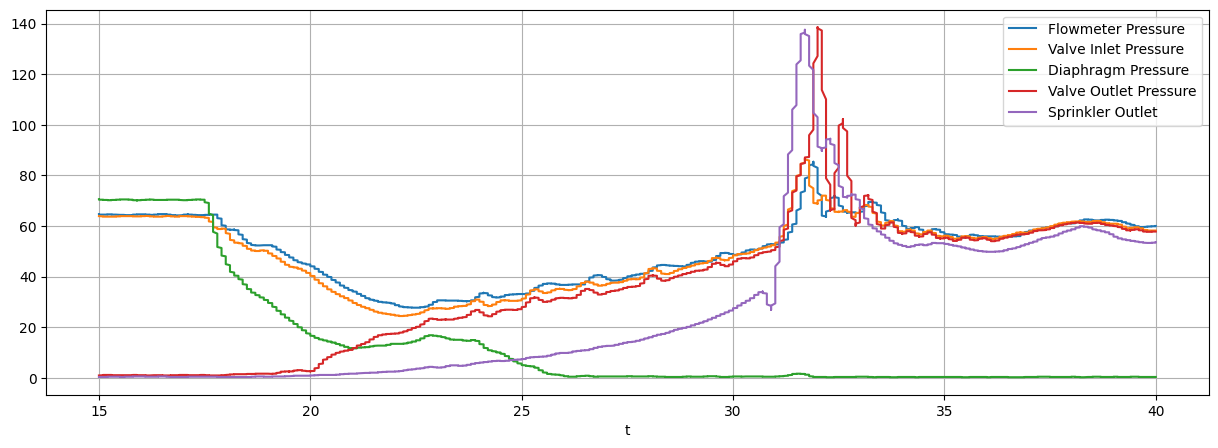

In [28]:
df3[['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']][15:40].plot(grid='on', figsize = (15,5))

Text(0.5, 1.0, 'Flow Rate')

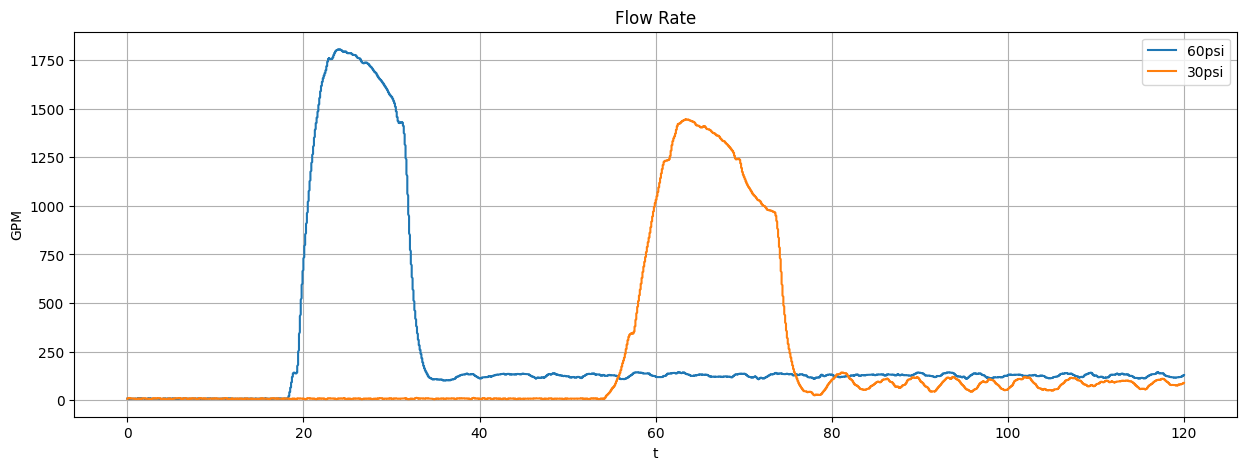

In [29]:
#
ax = df3['Flowmeter'][:120].plot(grid= 'on', figsize = (15,5), label = '60psi', legend = 'on')
df2['Flowmeter'][:120].plot(grid= 'on', figsize = (15,5), label = '30psi', legend = 'on')
ax.set_ylabel('GPM')
ax.set_title('Flow Rate')

Text(0.5, 1.0, 'Valve Inlet Pressure')

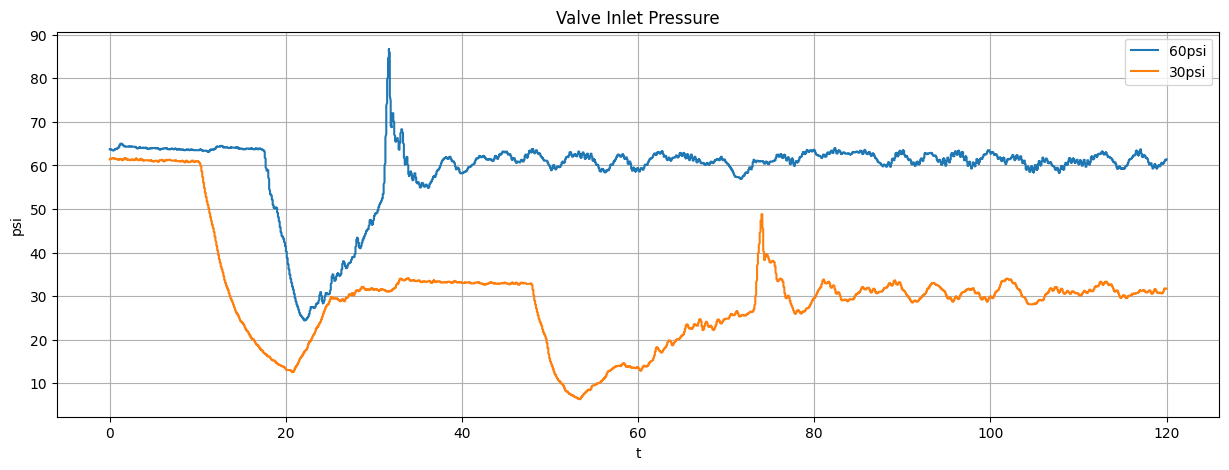

In [30]:
#
ax = df3['Valve Inlet Pressure'][:120].plot(grid= 'on', figsize = (15,5), label = '60psi', legend = 'on')
df2['Valve Inlet Pressure'][:120].plot(grid= 'on', figsize = (15,5), label = '30psi', legend = 'on')
ax.set_ylabel('psi')
ax.set_title('Valve Inlet Pressure')

# Quantifying Source

Text(0.5, 1.0, 'Flowmeter Pressure')

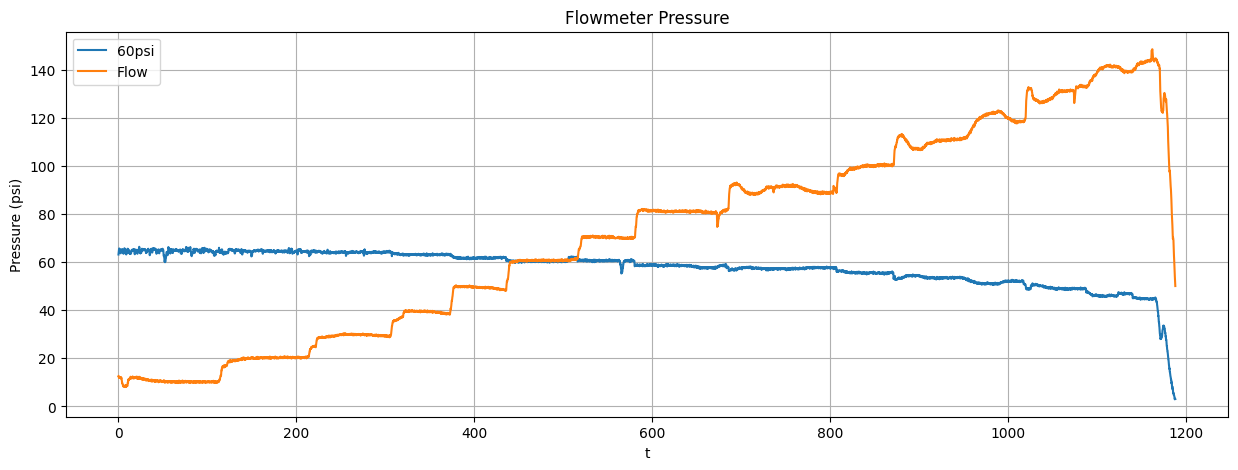

In [31]:
# This plot is just confusing and not usefull, the next plot is the important one
df_s30psi = pd.read_csv('FDTDrySystemSource30psiInternal1.csv')
df_s30psi.set_index('t', inplace=True)
df_s60psi = pd.read_csv('FDTDrySystemSource60psiInternal1.csv')
df_s60psi.set_index('t', inplace=True)
ax = df_s60psi['Flowmeter Pressure'].plot(grid= 'on', figsize = (15,5), label = '60psi', legend = 'on')
(df_s60psi['Flowmeter']/10.).plot(grid= 'on', figsize = (15,5), label = 'Flow', legend = 'on')
# df_s30psi['Flowmeter Pressure'][450:460].plot(grid= 'on', figsize = (15,5), label = '30psi', legend = 'on')
ax.set_ylabel('Pressure (psi)')
ax.set_title('Flowmeter Pressure')

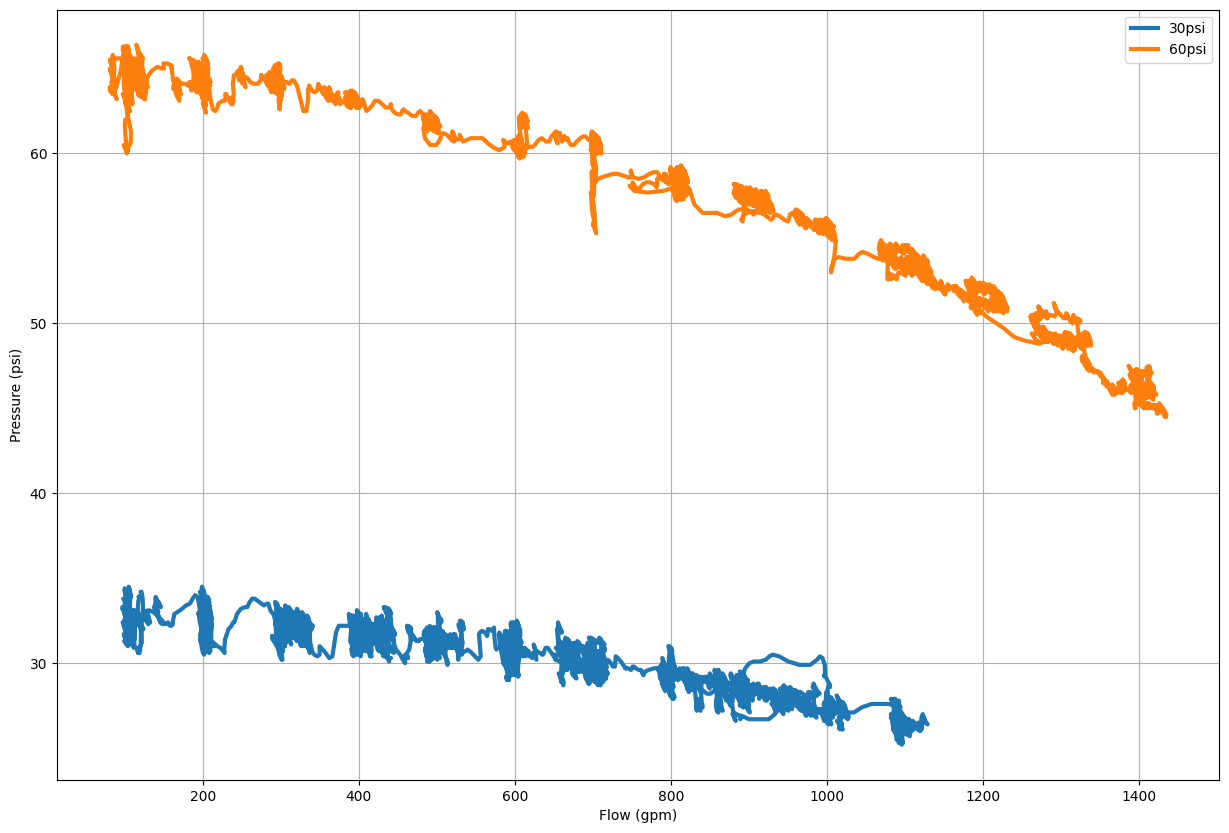

In [32]:
#
n = 1150
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(df_s30psi['Flowmeter'], df_s30psi['Flowmeter Pressure'], label = '30psi', linewidth = 3)
plt.plot(df_s60psi['Flowmeter'][:n], df_s60psi['Flowmeter Pressure'][:n], label = '60psi', linewidth = 3)
plt.grid()
plt.xlabel('Flow (gpm)')
plt.ylabel('Pressure (psi)')
plt.legend()
plt.show()

# 8" DV5 30psi 

<Axes: xlabel='t'>

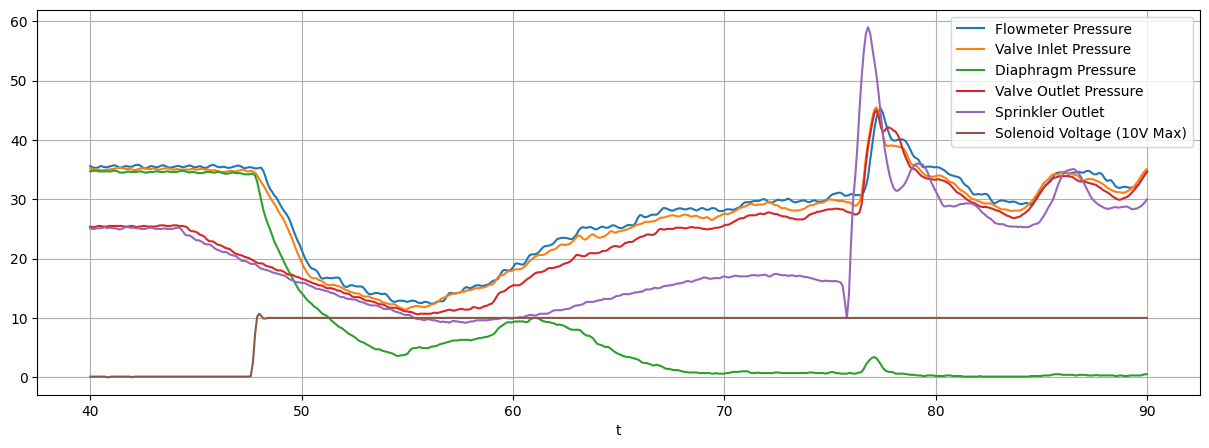

In [33]:
#
df5 = pd.read_csv('FDT8inDV5DeliveryInternal1.csv')
df5.set_index('t', inplace=True)
df5[['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet','Solenoid Voltage (10V Max)']][40:90].plot(grid='on', figsize = (15,5))

<Axes: xlabel='t'>

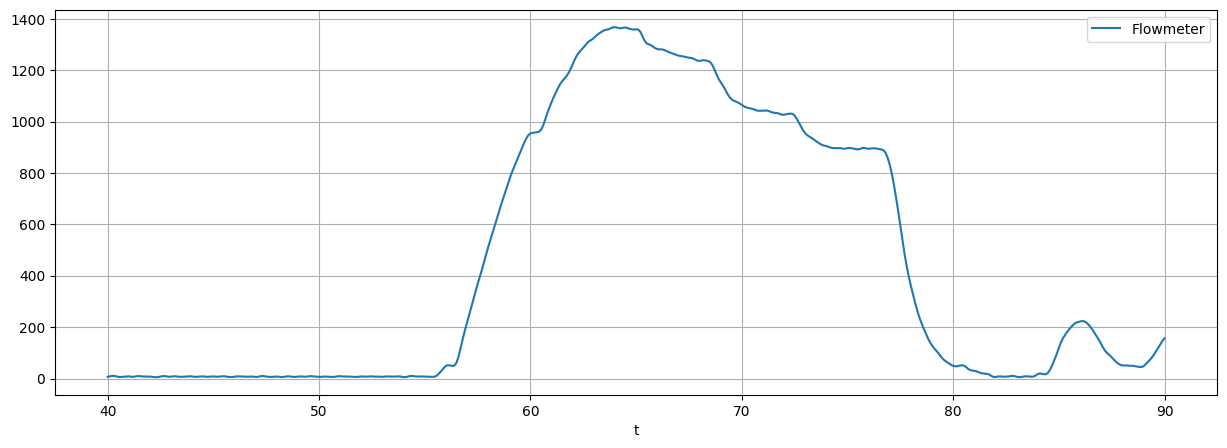

In [34]:
#
df5[['Flowmeter']][40:90].plot(grid='on', figsize = (15,5))

# 8in DV5 Delivery Tests

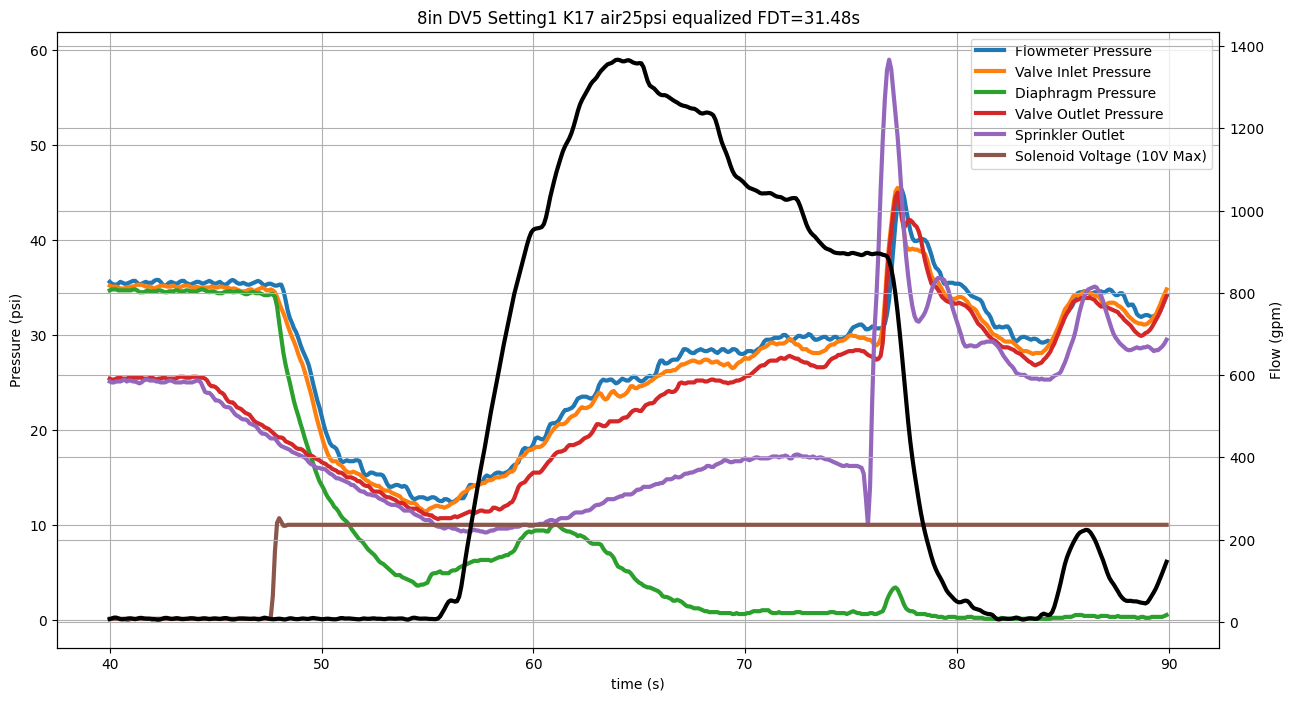

In [35]:
#8in DV5 Setting1 K17 air25psi equalized
filename = 'FDT8inDV5DeliveryInternal1'
first = 400
last = 900
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet','Solenoid Voltage (10V Max)']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('8in DV5 Setting1 K17 air25psi equalized FDT=31.48s')
plt.grid()
plt.show()

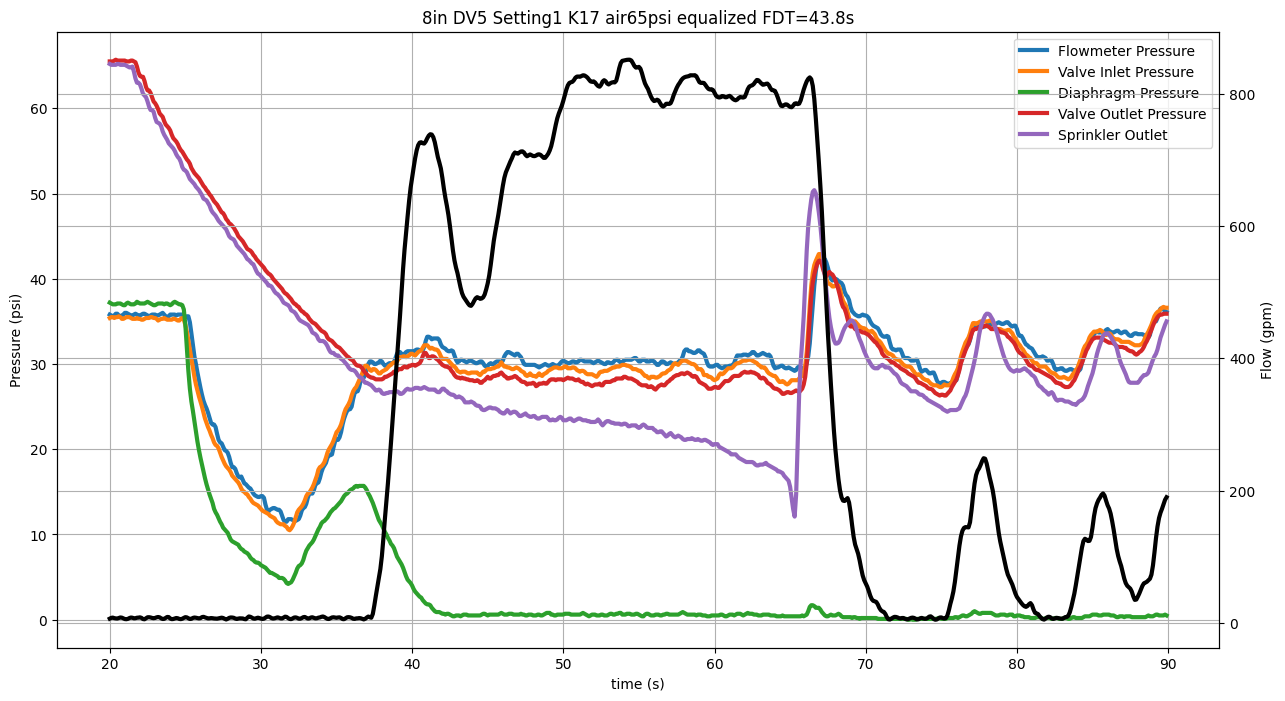

In [36]:
#8in DV5 Setting1 K17 air65psi equalized
filename = 'FDT8inDV5DeliveryInternal2'
first = 200
last = 900
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('8in DV5 Setting1 K17 air65psi equalized FDT=43.8s')
plt.grid()
plt.show()

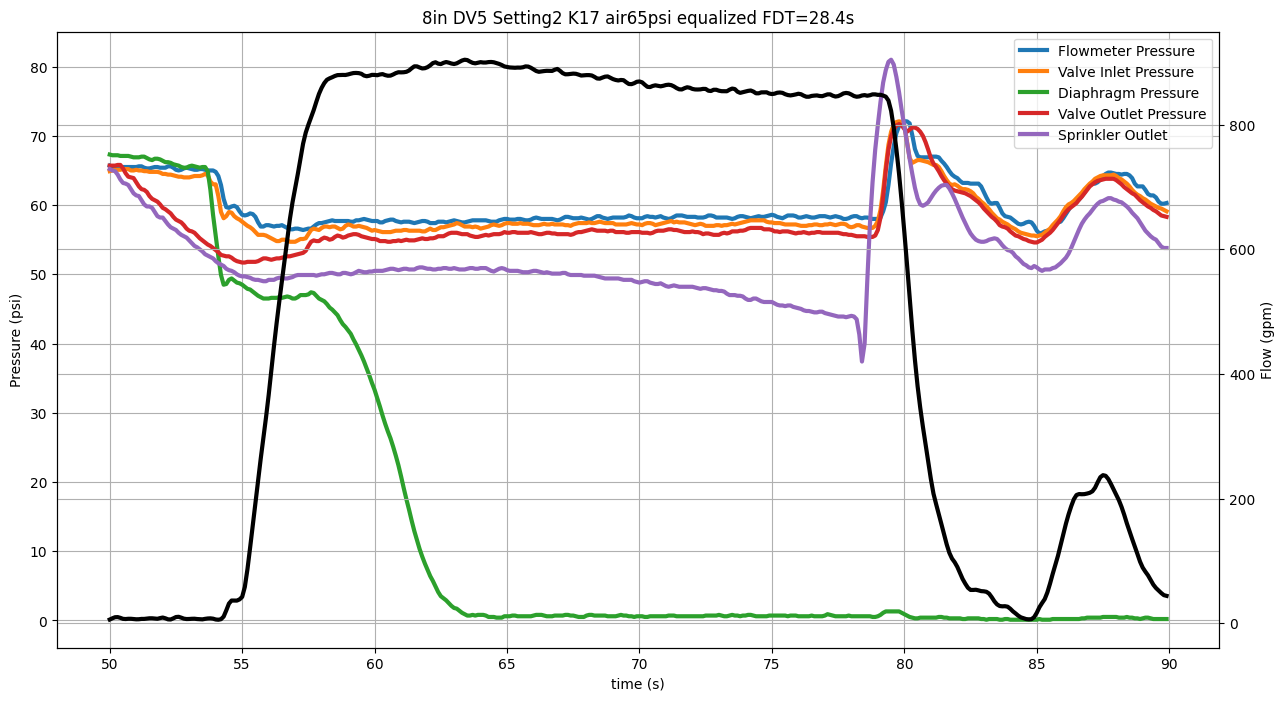

In [37]:
#8in DV5 Setting2 K17 air65psi equalized
filename = 'FDT8inDV5DeliveryInternal3'
first = 500
last = 900
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('8in DV5 Setting2 K17 air65psi equalized FDT=28.4s')
plt.grid()
plt.show()

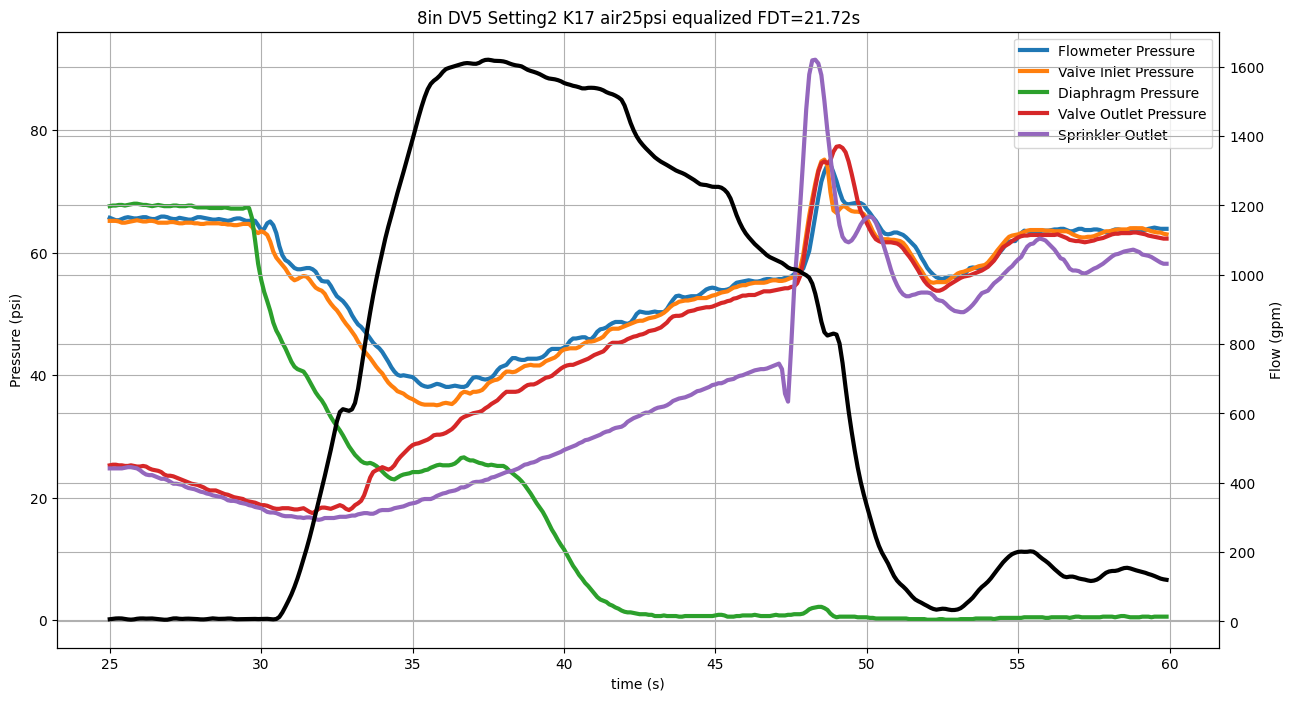

In [38]:
#8in DV5 Setting2 K17 air25psi equalized
filename = 'FDT8inDV5DeliveryInternal4'
first = 250
last = 600
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('8in DV5 Setting2 K17 air25psi equalized FDT=21.72s')
plt.grid()
plt.show()

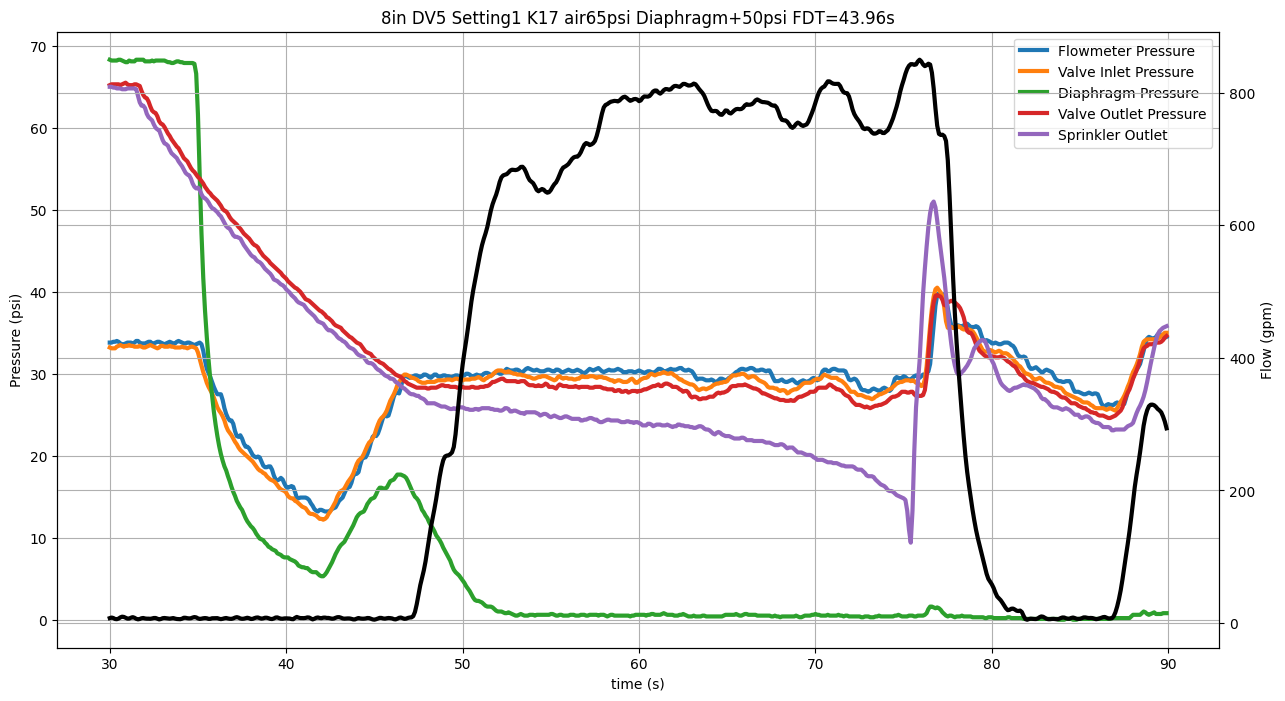

In [39]:
#8in DV5 Setting1 K17 air65psi Diaphragm+50psi
filename = 'FDT8inDV5DeliveryInternal5'
first = 300
last = 900
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('8in DV5 Setting1 K17 air65psi Diaphragm+50psi FDT=43.96s')
plt.grid()
plt.show()

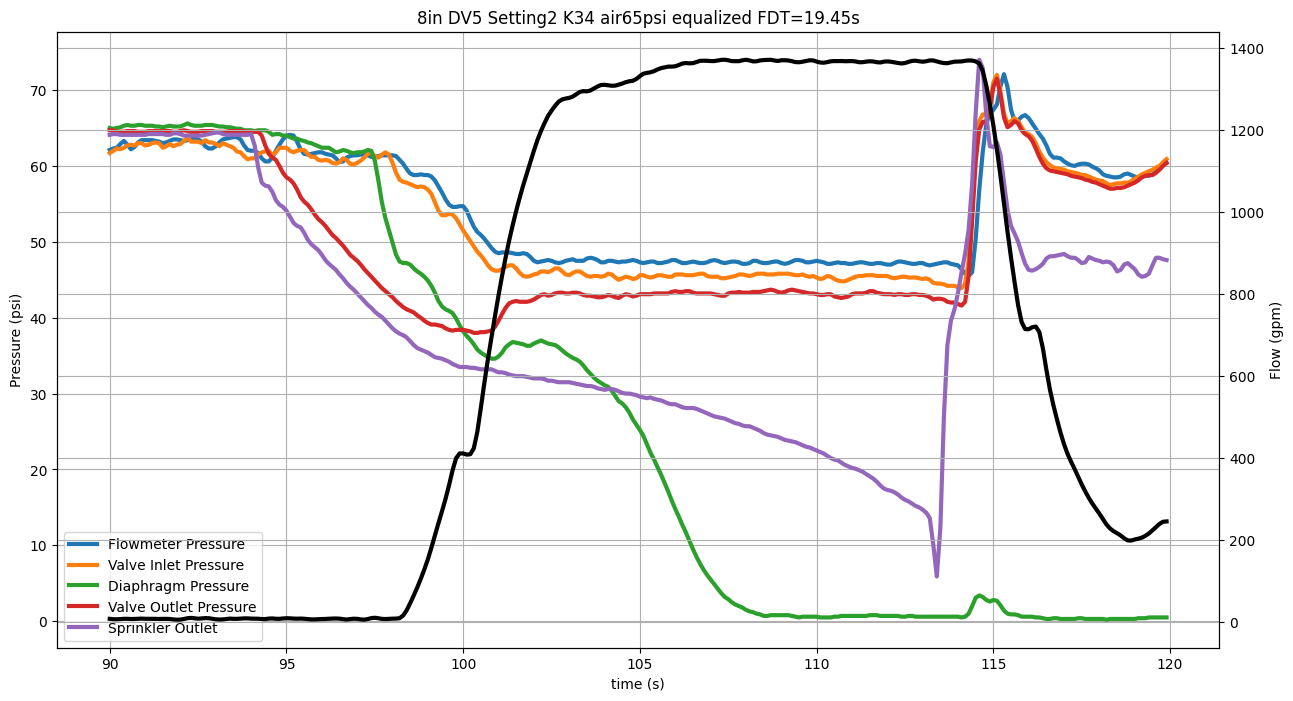

In [40]:
#8in DV5 Setting2 K34 air65psi equalized
filename = 'FDT8inDV5DeliveryInternal6'
first = 900
last = 1200
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('8in DV5 Setting2 K34 air65psi equalized FDT=19.45s')
plt.grid()
plt.show()

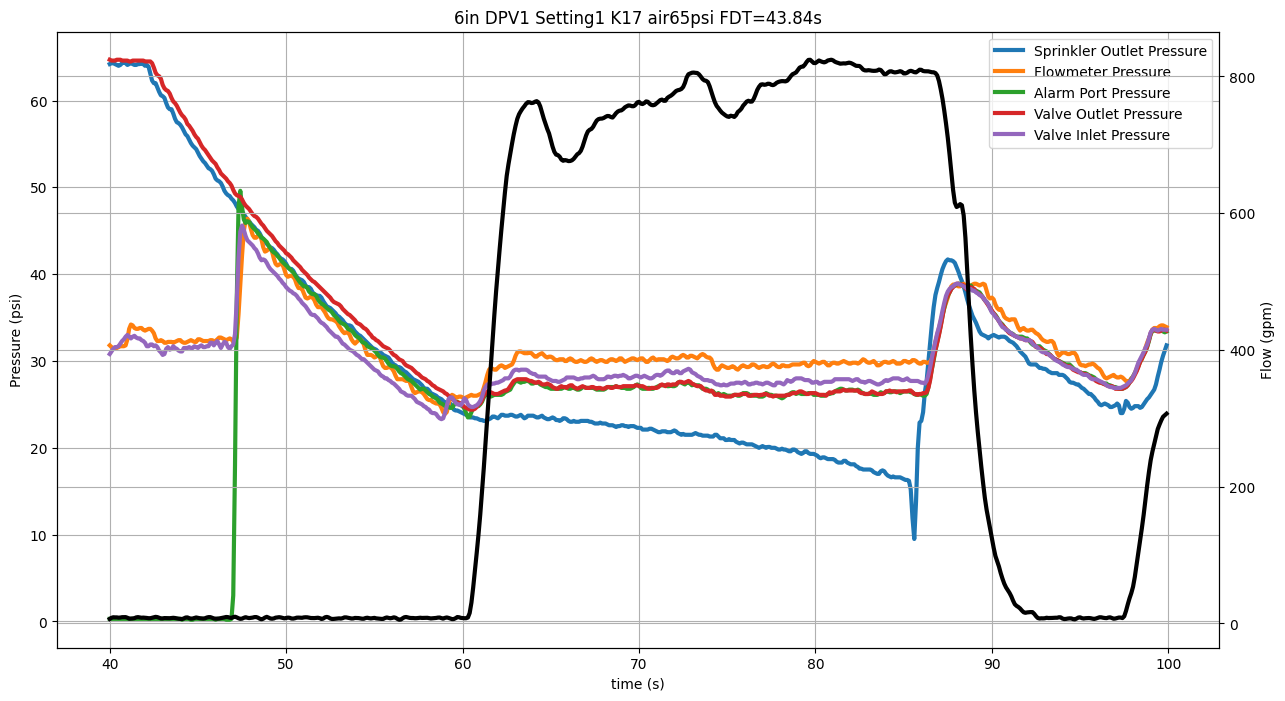

In [41]:
# 6in DPV1 Setting1 K17 air65psi
filename = 'FDT6inDPV1DeliveryInternal1'
first = 400
last = 1000
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
 
for i in ['Sprinkler Outlet Pressure','Flowmeter Pressure', 'Alarm Port Pressure', 'Valve Outlet Pressure','Valve Inlet Pressure']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter Flowrate'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('6in DPV1 Setting1 K17 air65psi FDT=43.84s')
plt.grid()
plt.show()

NameError: name 'pvData' is not defined

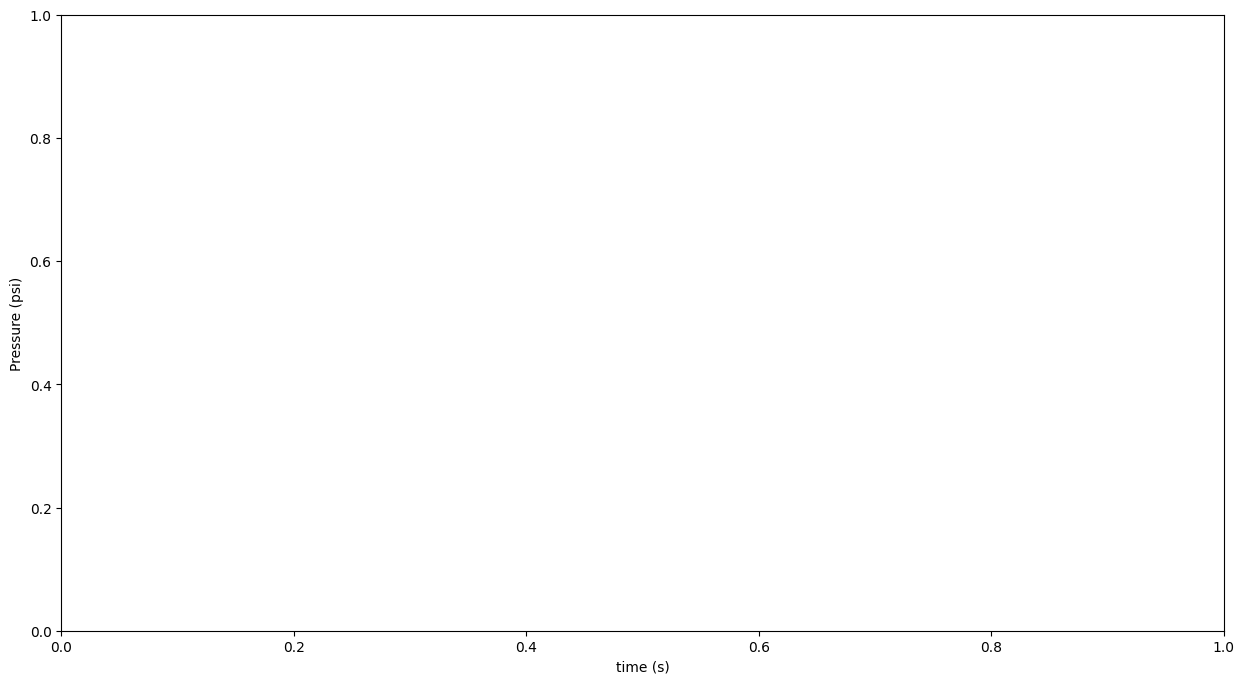

In [42]:
# 6in DPV1 Setting2 K17 air65psi
filename = 'FDT6inDPV1DeliveryInternal2'
first = 250
last = 700
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')

ax1.plot(pvData['time'],pvData['P'], color='black')

for i in ['Sprinkler Outlet Pressure','Flowmeter Pressure', 'Alarm Port Pressure', 'Valve Outlet Pressure','Valve Inlet Pressure']:
    ax1.plot(df5['t'][first:last]-30, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-30, df5['Flowmeter Flowrate'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

ax2.plot(pvData['time'],pvData['flow'], color='red')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('6in DPV1 Setting2 K17 air65psi FDT=28.65s')
plt.grid()
plt.show()

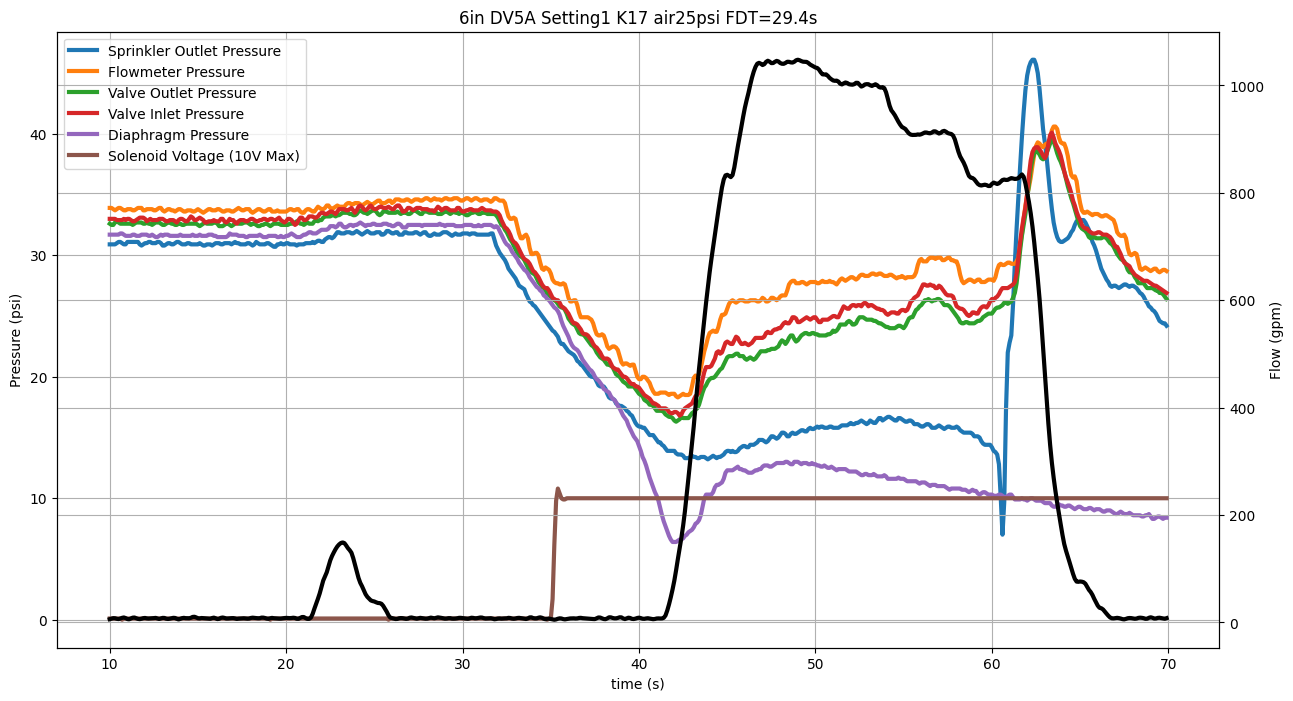

In [43]:
# 6in DV5A Setting1 K17 air25psi
filename = 'FDT6inDV5ADeliveryInternal1'
first = 100
last = 700
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
['t', 'Flowmeter Flowrate', 'Sprinkler Outlet Pressure',
       'Flowmeter Pressure', 'Diaphragm Pressure', 'Valve Outlet Pressure',
       'Valve Inlet Pressure', 'Solenoid Voltage (10V Max)',
       'Voltage In Channel 2'] 
for i in ['Sprinkler Outlet Pressure','Flowmeter Pressure', 'Valve Outlet Pressure','Valve Inlet Pressure','Diaphragm Pressure','Solenoid Voltage (10V Max)']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter Flowrate'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('6in DV5A Setting1 K17 air25psi FDT=29.4s')
plt.grid()
plt.show()

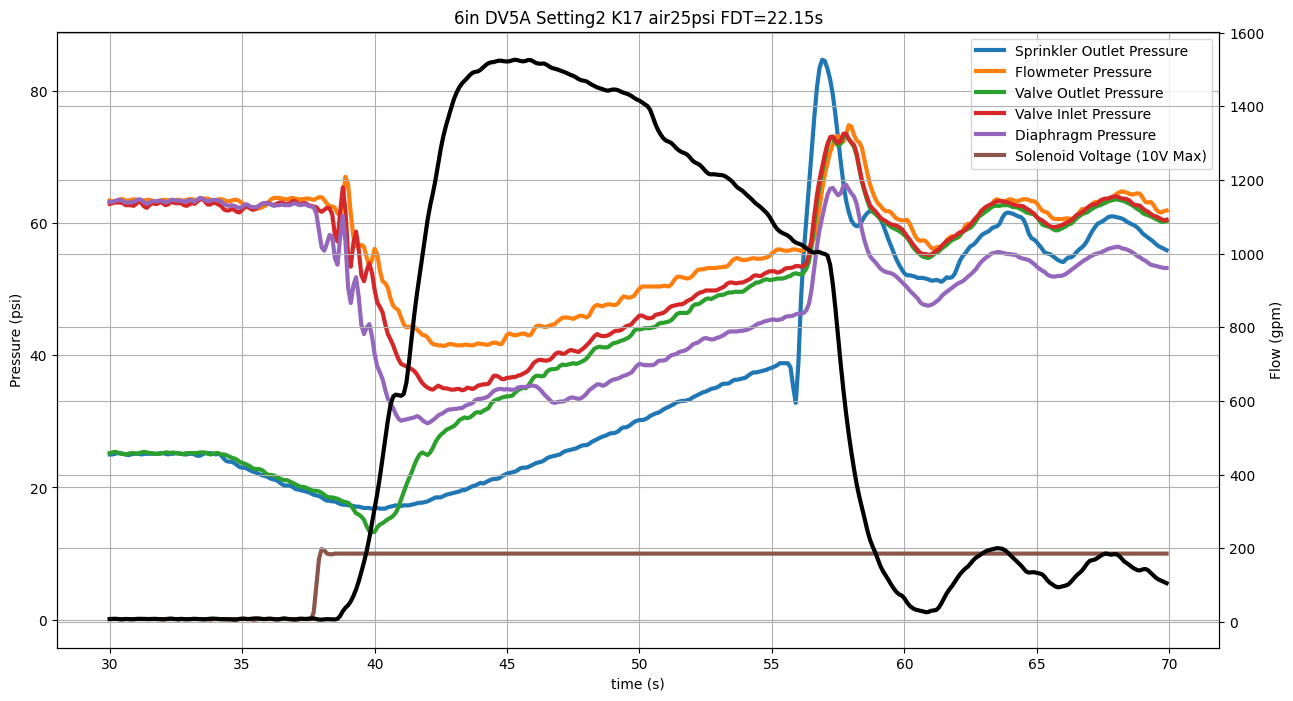

In [44]:
# 6in DV5A Setting2 K17 air35psi
filename = 'FDT6inDV5ADeliveryInternal2'
first = 300
last = 700
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
 
for i in ['Sprinkler Outlet Pressure','Flowmeter Pressure', 'Valve Outlet Pressure','Valve Inlet Pressure','Diaphragm Pressure','Solenoid Voltage (10V Max)']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter Flowrate'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('6in DV5A Setting2 K17 air25psi FDT=22.15s')
plt.grid()
plt.show()

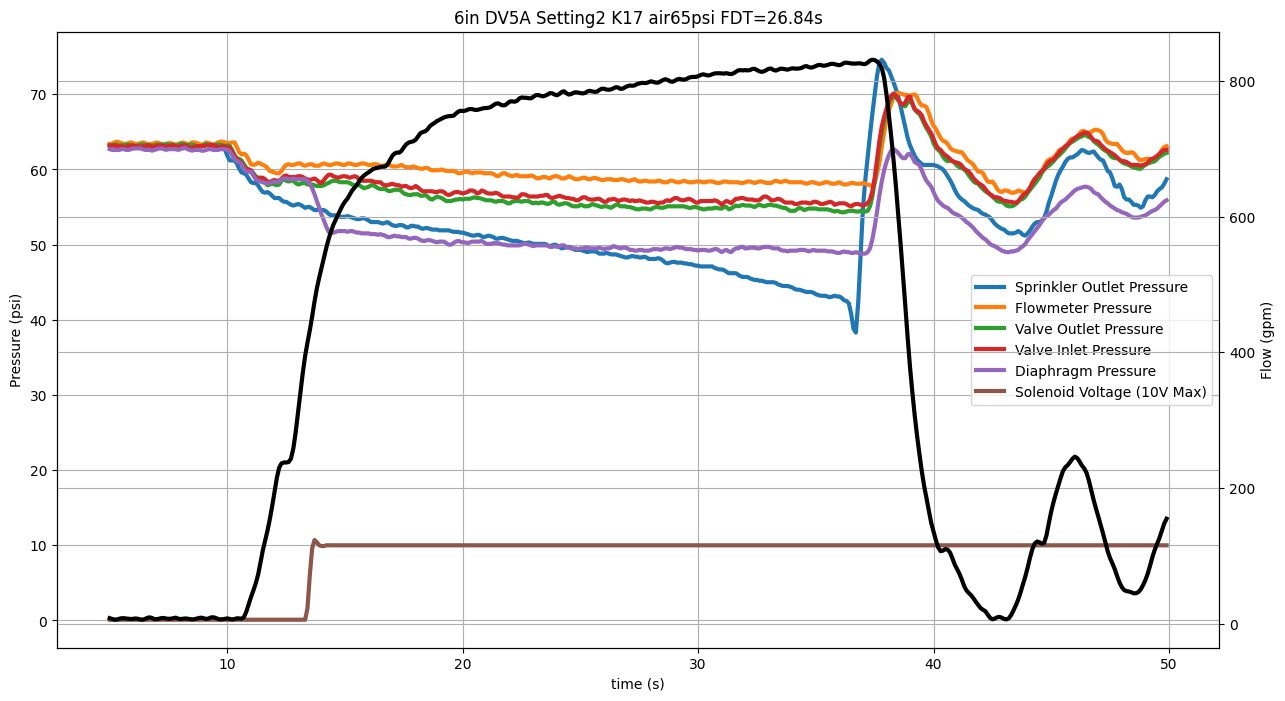

In [45]:
# 6in DV5A Setting2 K17 air65psi
filename = 'FDT6inDV5ADeliveryInternal3'
first = 50
last = 500
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
 
for i in ['Sprinkler Outlet Pressure','Flowmeter Pressure', 'Valve Outlet Pressure','Valve Inlet Pressure','Diaphragm Pressure','Solenoid Voltage (10V Max)']:
    ax1.plot(df5['t'][first:last], df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last], df5['Flowmeter Flowrate'][first:last], label = 'Flowmeter', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend()
# ax2.legend()
plt.title('6in DV5A Setting2 K17 air65psi FDT=26.84s')
plt.grid()
plt.show()

# Experimental results after switching the pump to manual mode

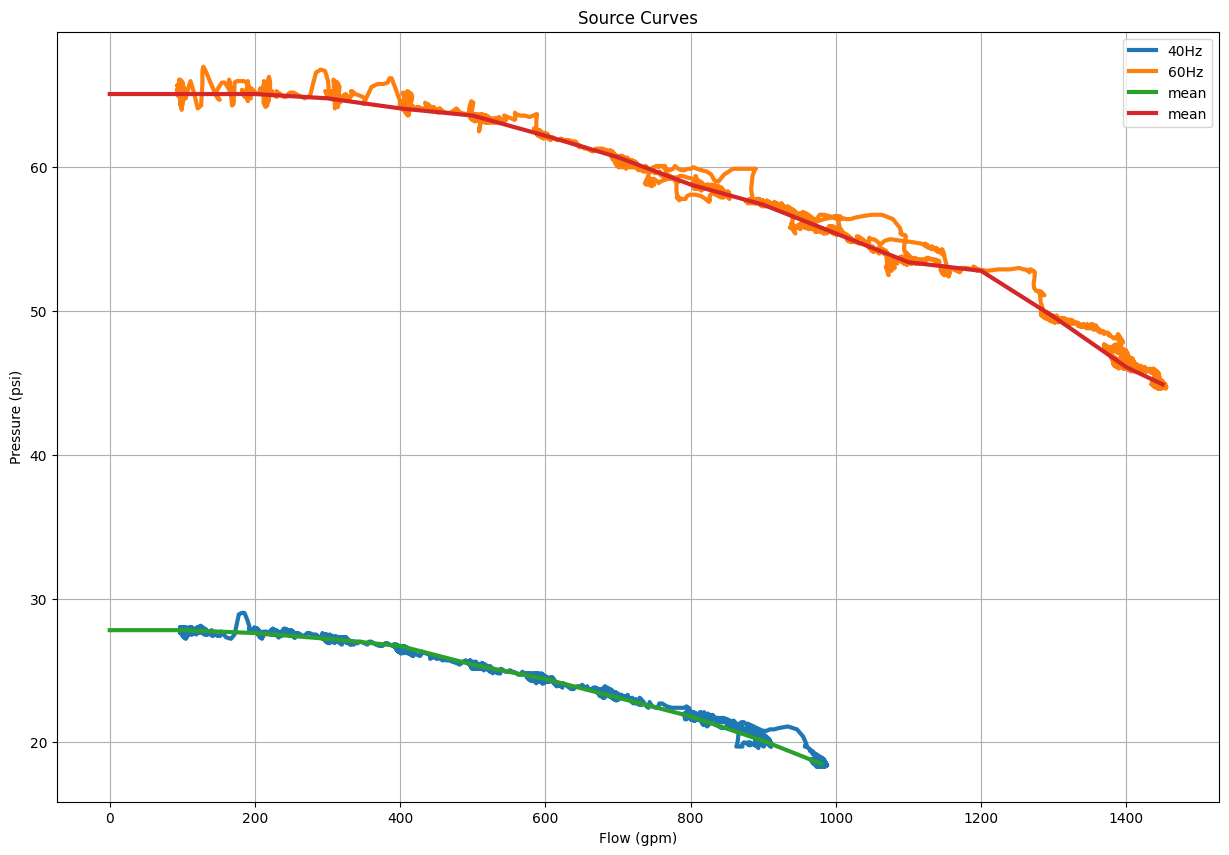

In [46]:
#Quantifying source
df_40Hz = pd.read_csv('QuantifyingSourceManual40Hz.csv')
df_60Hz = pd.read_csv('QuantifyingSourceManual60Hz.csv')

measuredFlow40Hz = [0,100,200,300,400,500,600,700,800,900,980]
df_40Hz_points = [27.8,27.8,27.6,27.2,26.7,25.4,24.4,23.1,21.8,20.1,18.5]

measuredFlow60Hz = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1450]
df_60Hz_points = [65.1,65.1,65.1,64.8,64.1,63.6,62.2,60.7,58.8,57.4,55.4,53.4,52.8,49.6,46.1,44.9]

f = plt.figure()
n = 1150
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df_40Hz['Flowmeter Flowrate'], df_40Hz['Flowmeter Pressure'], label = '40Hz', linewidth = 3)
plt.plot(df_60Hz['Flowmeter Flowrate'], df_60Hz['Flowmeter Pressure'], label = '60Hz', linewidth = 3)

plt.plot(measuredFlow40Hz, df_40Hz_points, label='mean', linewidth = 3)
plt.plot(measuredFlow60Hz, df_60Hz_points, label='mean', linewidth = 3)
# plt.plot(df_s60psi['Flowmeter'][:n], df_s60psi['Flowmeter Pressure'][:n], label = '60psi', linewidth = 3)
plt.grid()
plt.xlabel('Flow (gpm)')
plt.ylabel('Pressure (psi)')
plt.legend()
plt.title('Source Curves')
plt.show()
f.savefig("source.pdf", bbox_inches='tight')

# 8inch DV5

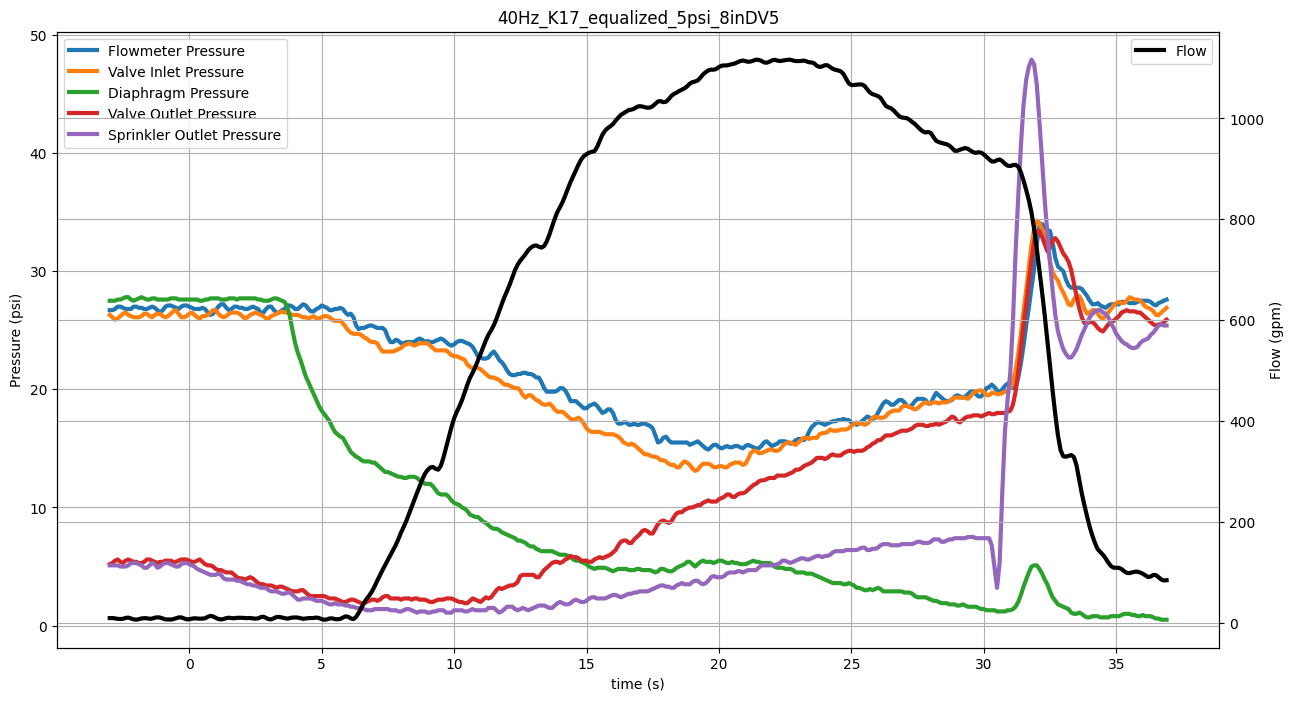

In [47]:
# 40Hz_K17_equalized_5psi_8inDV5
filename = '40Hz_K17_equalized_5psi_8inDV5'
first = 600
last = 1000
start = 63
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
# ax2.legend()
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

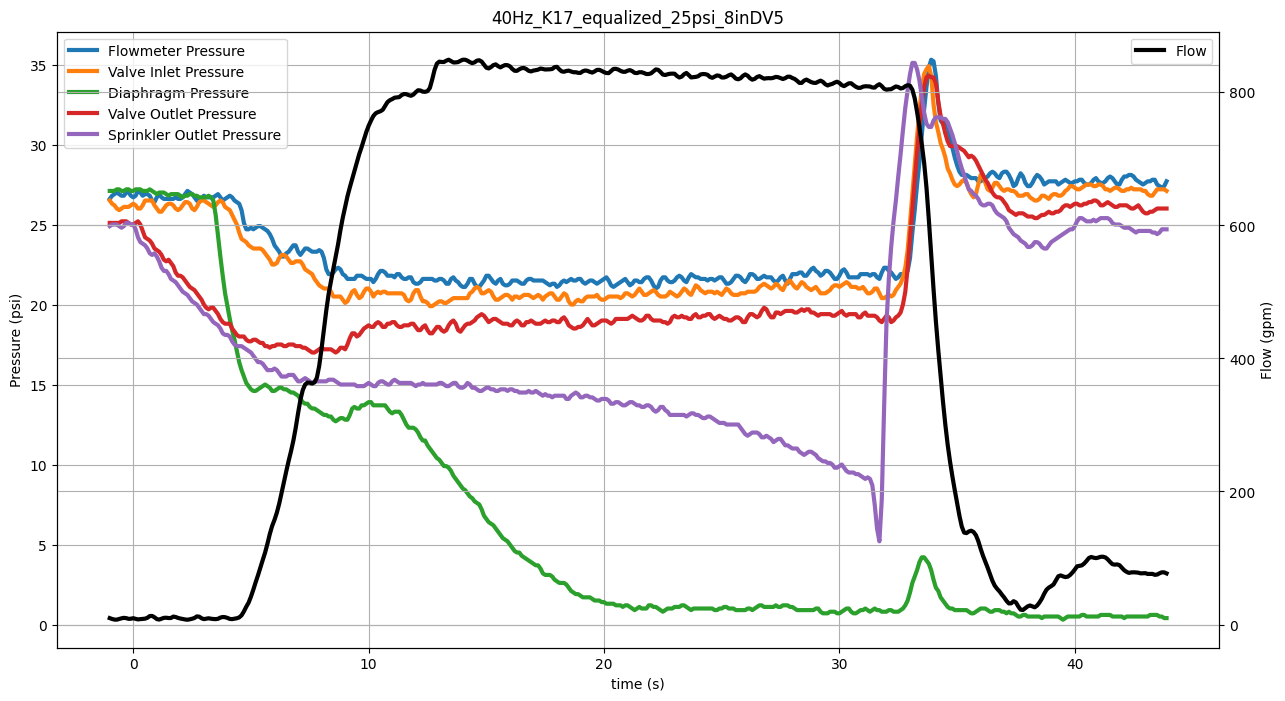

In [48]:
# 40Hz_K17_equalized_25psi_8inDV5
filename = '40Hz_K17_equalized_25psi_8inDV5'
first = 200
last = 650
start = 21
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

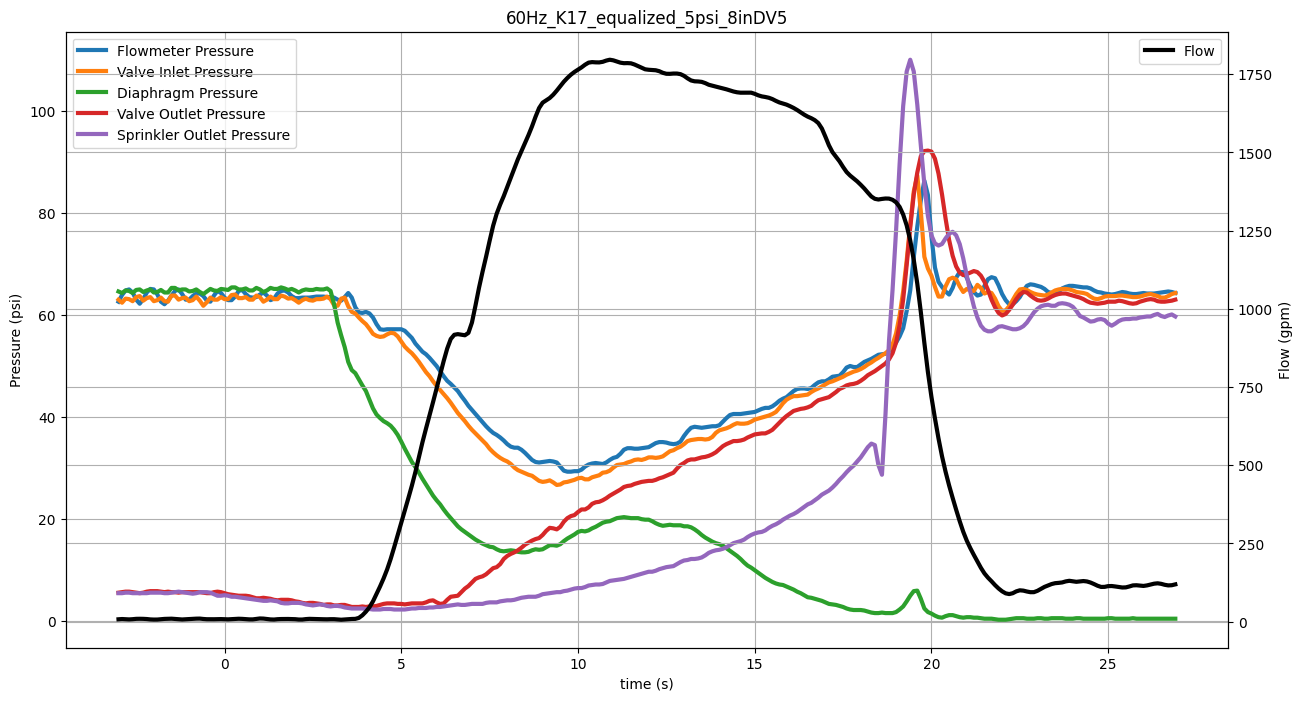

In [49]:
# 60Hz_K17_equalized_5psi_8inDV5

filename = '60Hz_K17_equalized_5psi_8inDV5'
first = 750
last = 1050
start = 78
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

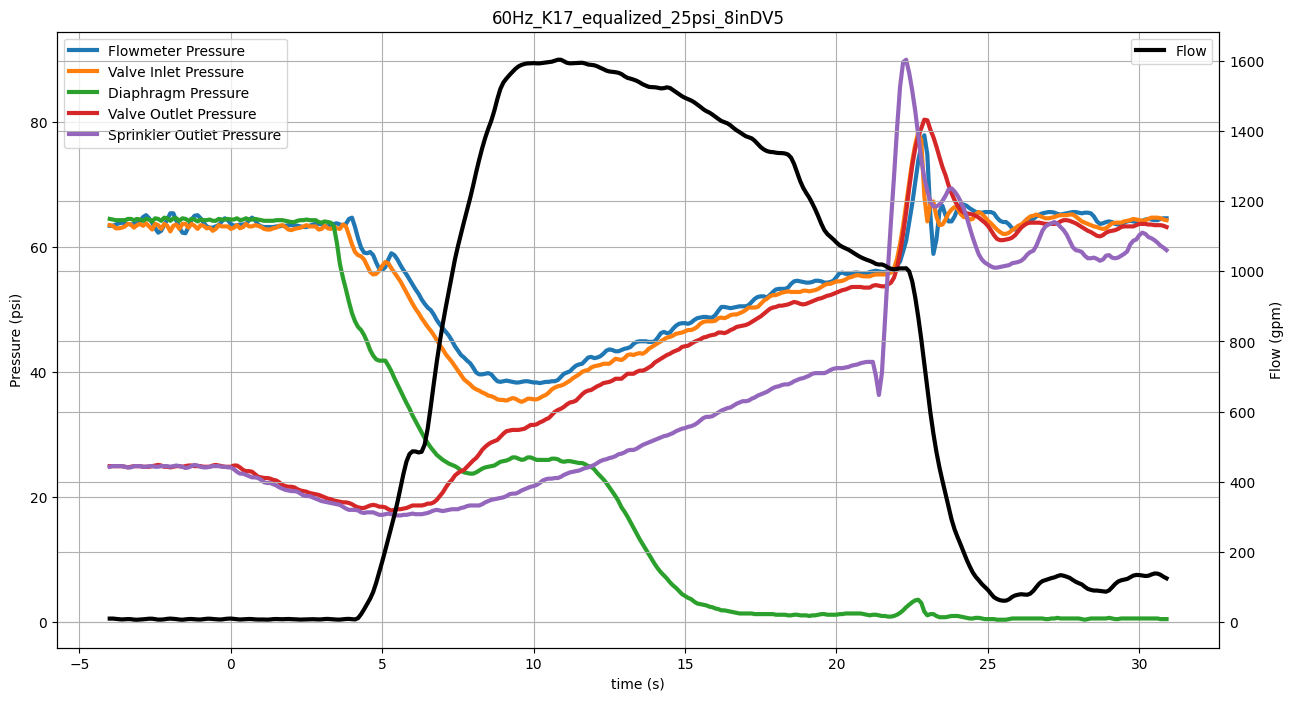

In [50]:
# 60Hz_K17_equalized_25psi_8inDV5
filename = '60Hz_K17_equalized_25psi_8inDV5'
first = 500
last = 850
start = 54
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

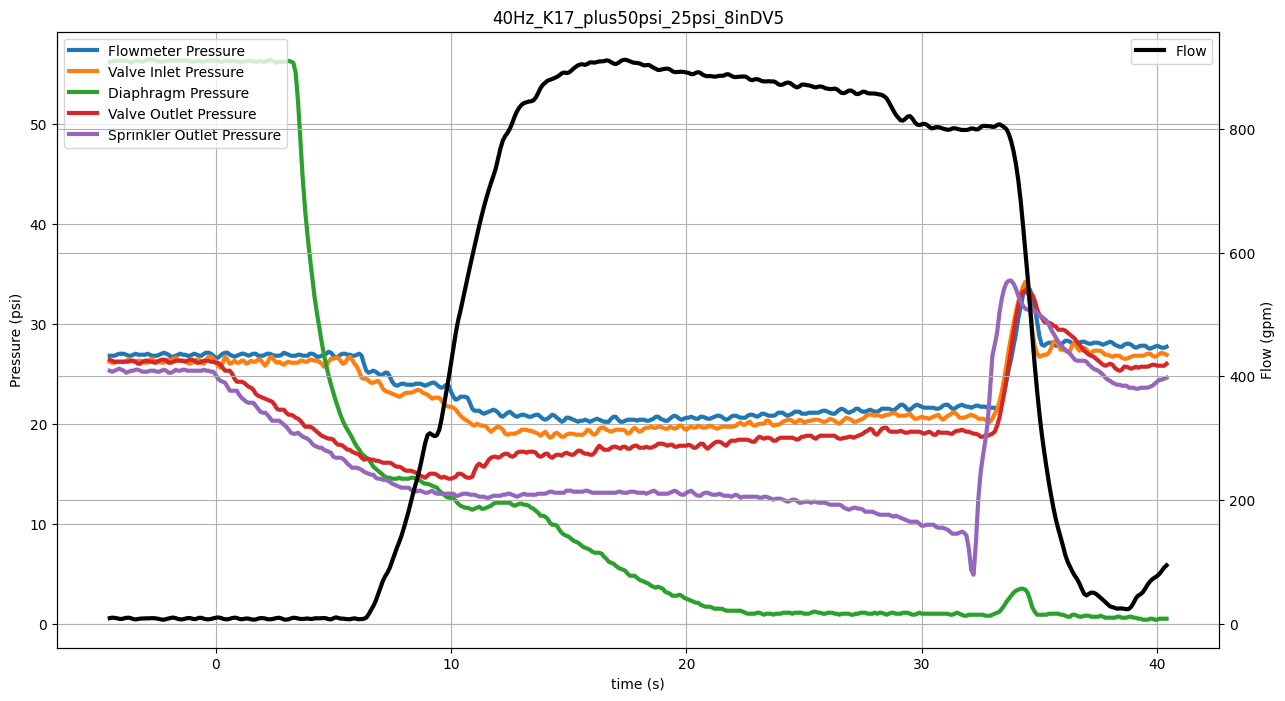

In [51]:
# 40Hz_K17_plus50psi_25psi_8inDV5
filename = '40Hz_K17_plus50psi_25psi_8inDV5'
first = 150
last = 600
start = 19.5
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

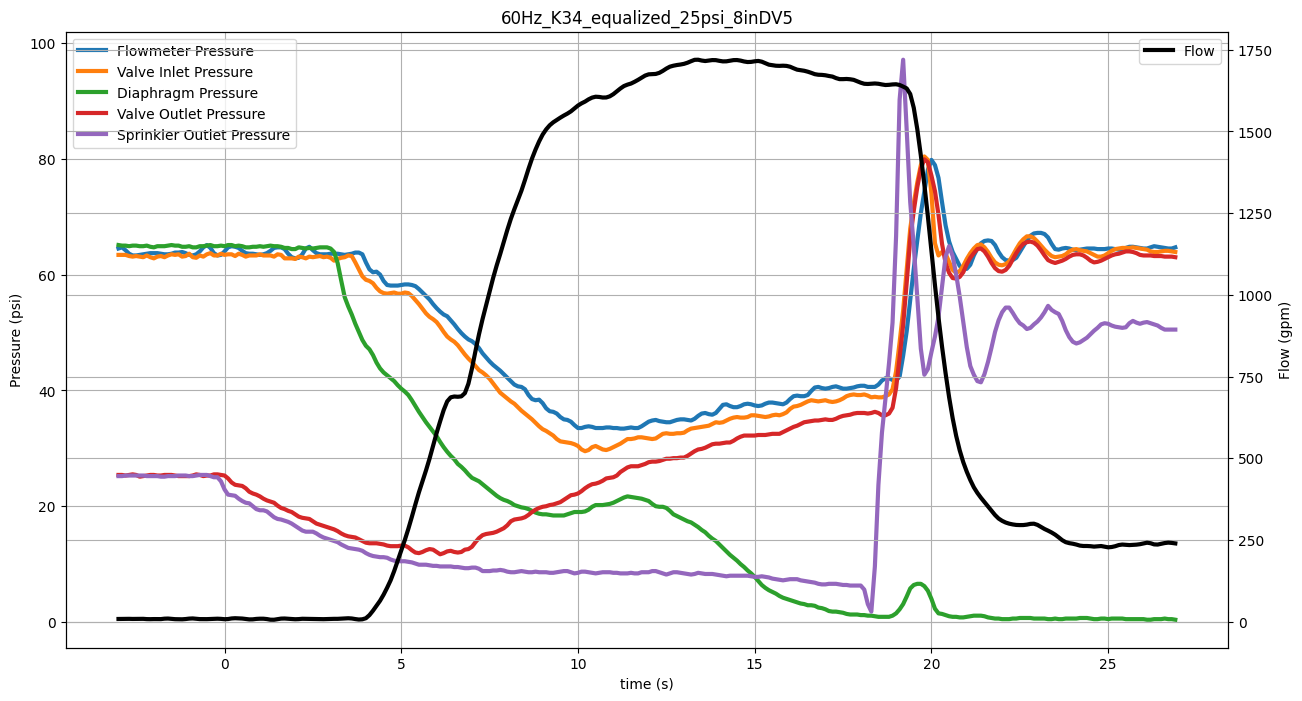

In [52]:
# 60Hz_K34_equalized_25psi_8inDV5
filename = '60Hz_K34_equalized_25psi_8inDV5'
first = 450
last = 750
start = 48
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

# 6inch DV-5A

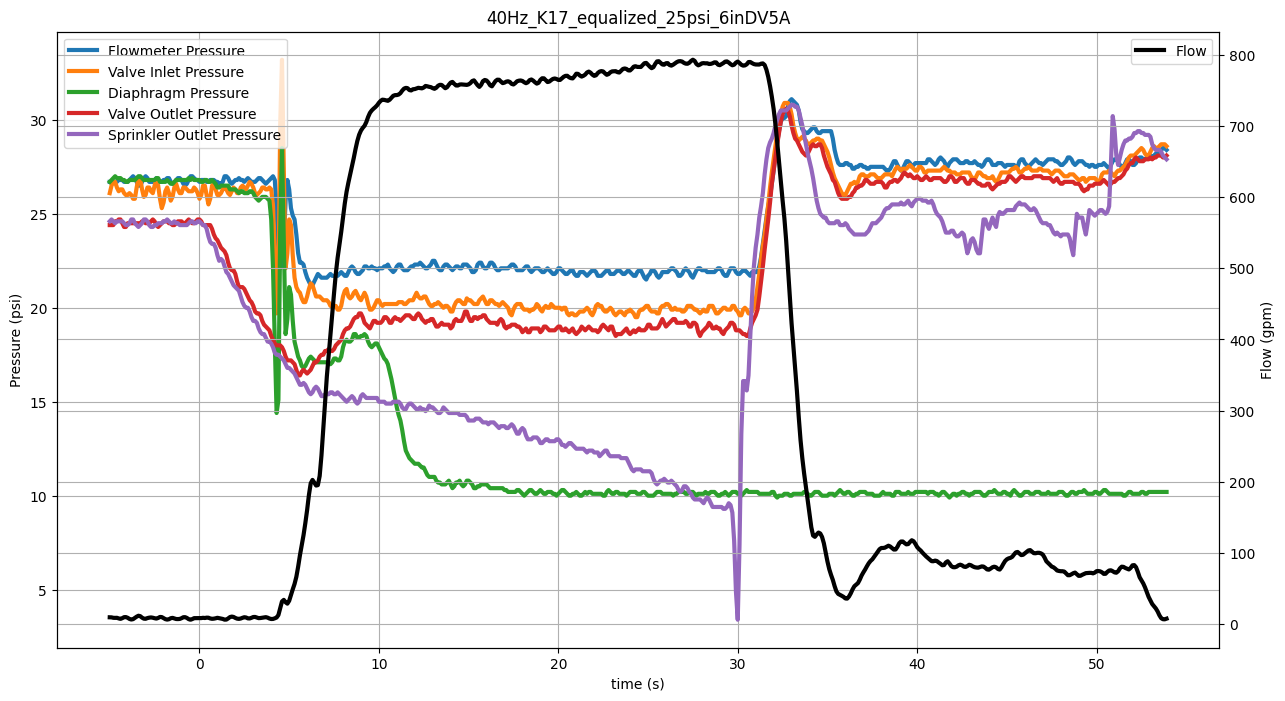

In [53]:
# 40Hz_K17_equalized_25psi_6inDV5A
filename = '40Hz_K17_equalized_25psi_6inDV5A'
first = 250
last = 1000
start = 30
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

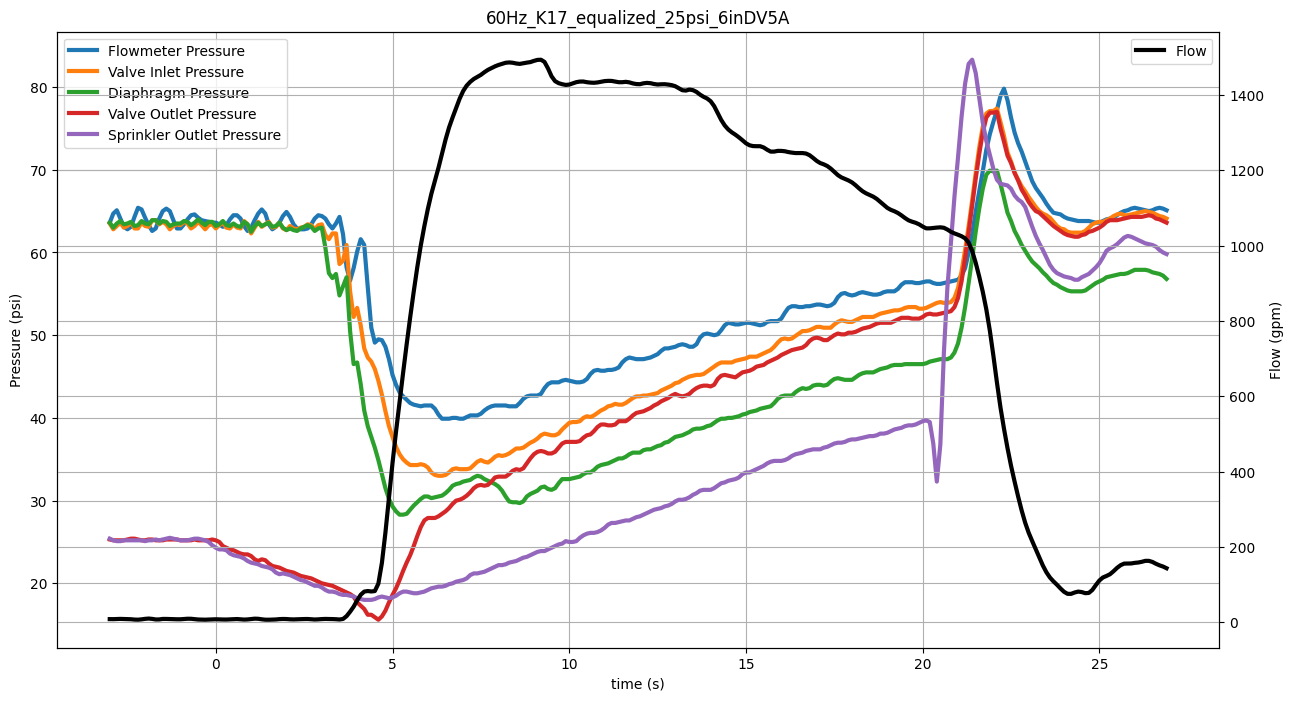

In [54]:
# 60Hz_K17_equalized_25psi_6inDV5A
filename = '60Hz_K17_equalized_25psi_6inDV5A'
first = 150
last = 450
start = 18
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

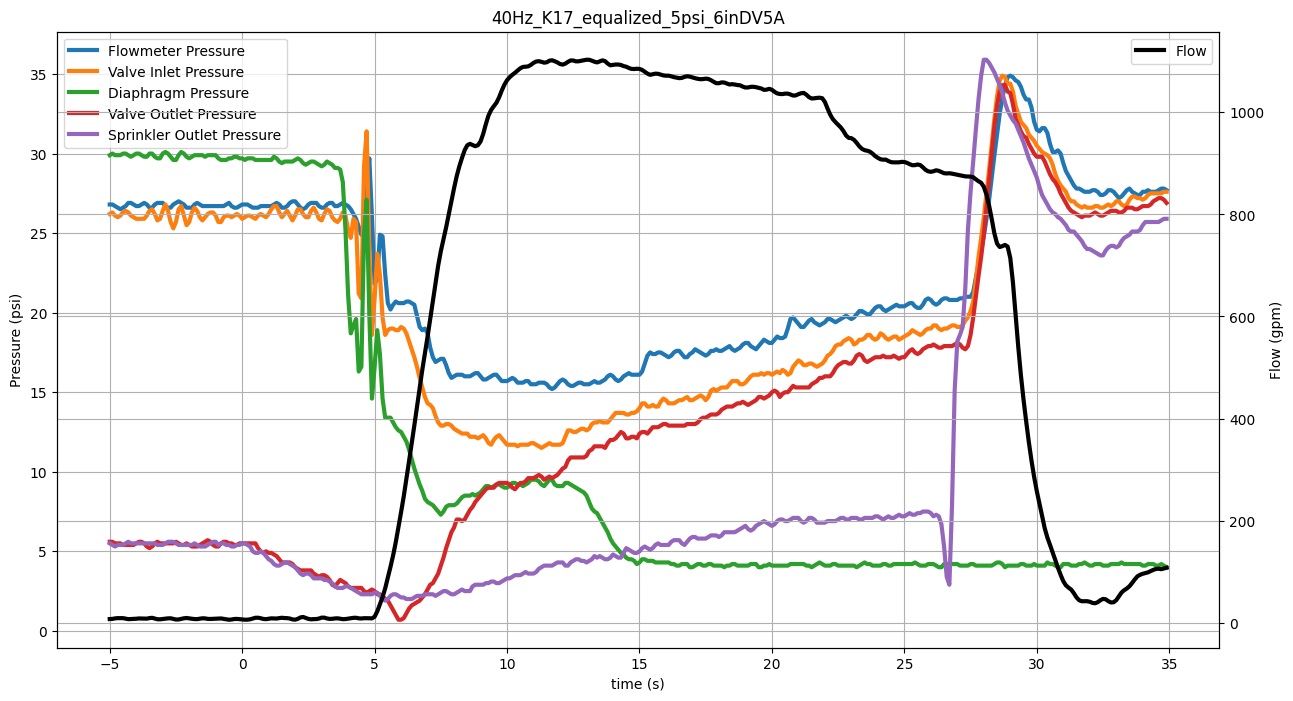

In [55]:
# 40Hz_K17_equalized_5psi_6inDV5A
filename = '40Hz_K17_equalized_5psi_6inDV5A'
first = 250
last = 650
start = 30
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

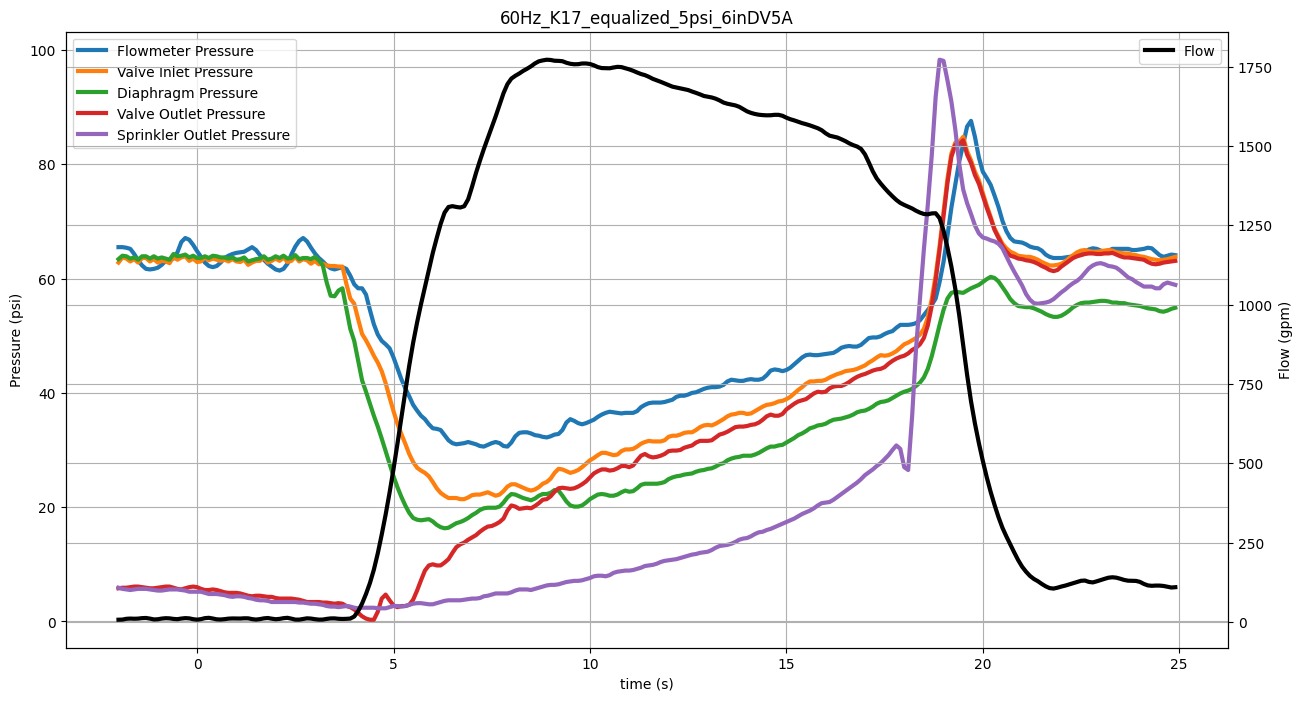

In [56]:
# 60Hz_K17_equalized_5psi_6inDV5A
filename = '60Hz_K17_equalized_5psi_6inDV5A'
first = 80
last = 350
start = 10
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

# 6 inch DV5

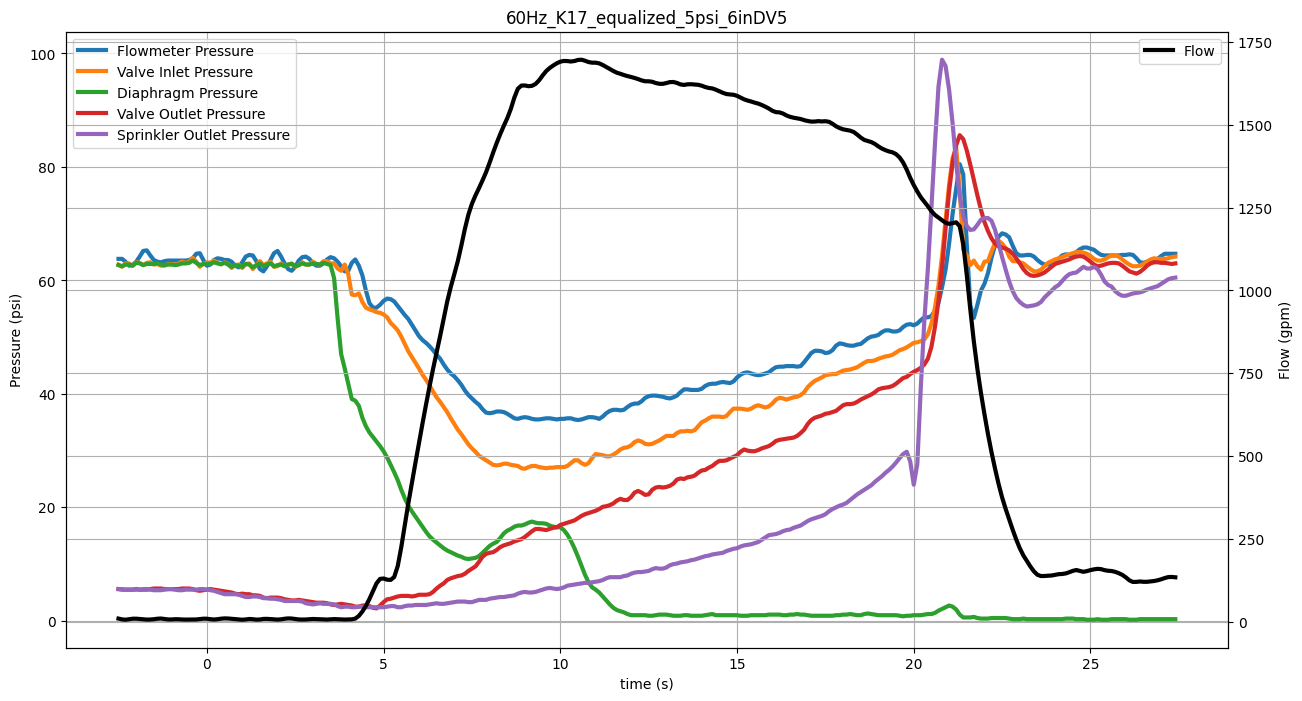

In [57]:
# 60Hz_K17_equalized_5psi_6inDV5
filename = '60Hz_K17_equalized_5psi_6inDV5'
first = 350
last = 650
start = 37.5
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

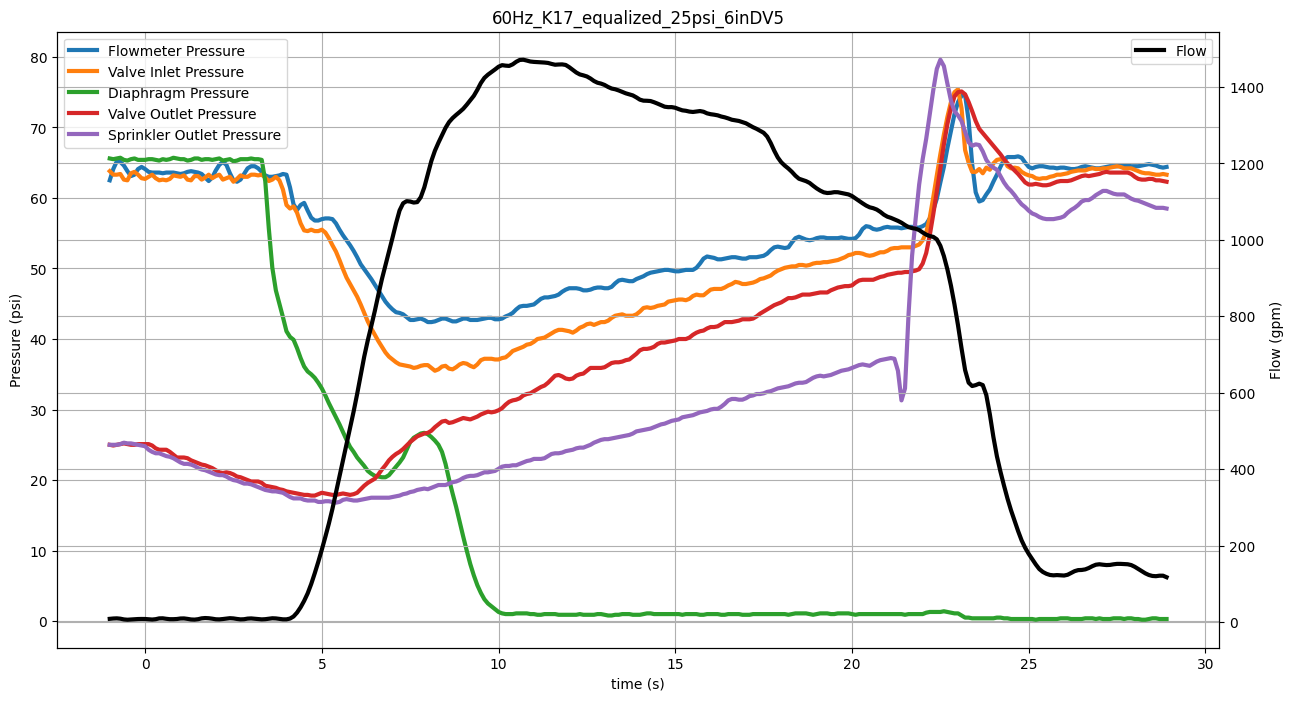

In [58]:
# 60Hz_K17_equalized_25psi_6inDV5
filename = '60Hz_K17_equalized_25psi_6inDV5'
first = 500
last = 800
start = 51
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

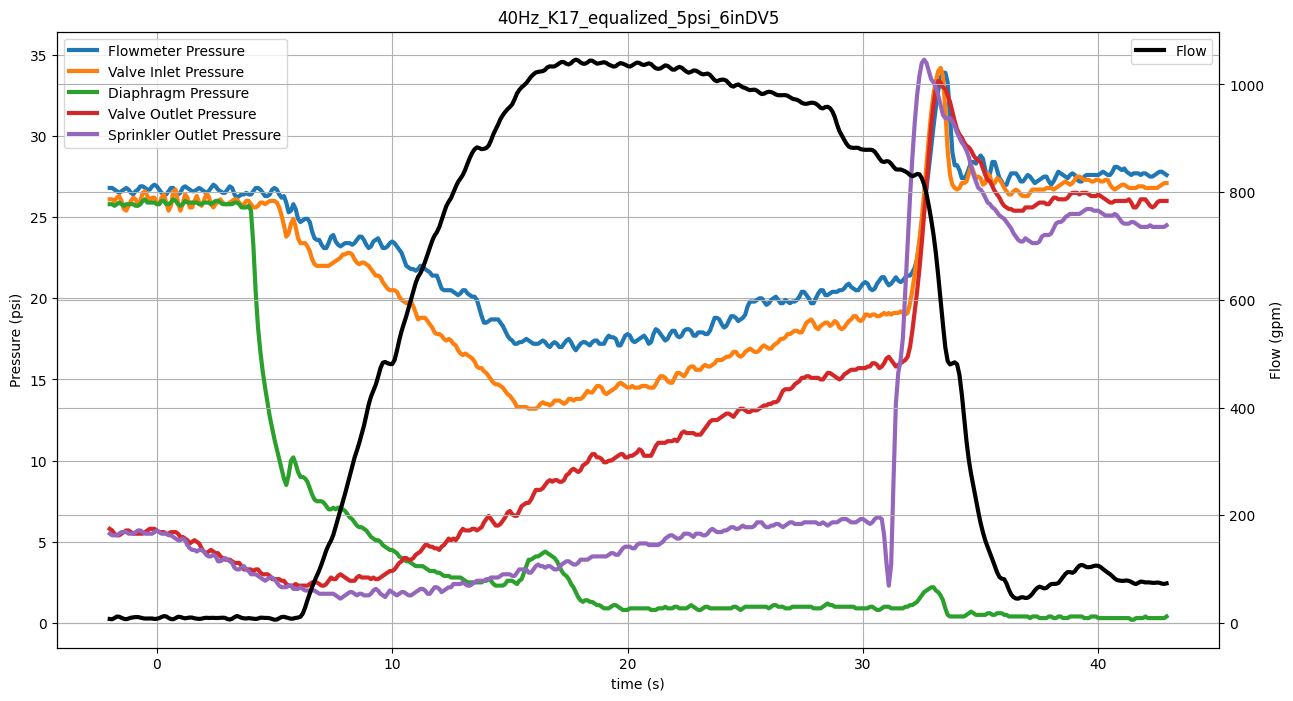

In [59]:
# 40Hz_K17_equalized_5psi_6inDV5
filename = '40Hz_K17_equalized_5psi_6inDV5'
first = 350
last = 800
start = 37
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

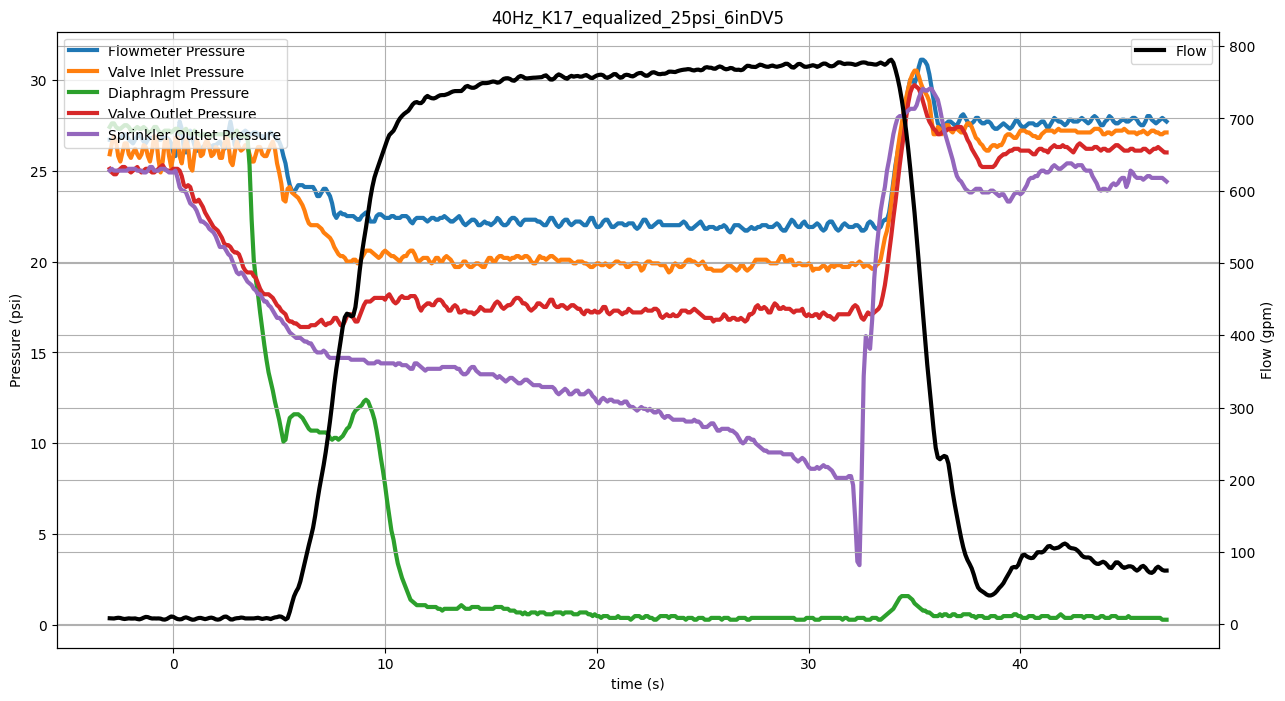

In [60]:
# 40Hz_K17_equalized_25psi_6inDV5
filename = '40Hz_K17_equalized_25psi_6inDV5'
first = 100
last = 600
start = 13
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

## 8inch DV5A

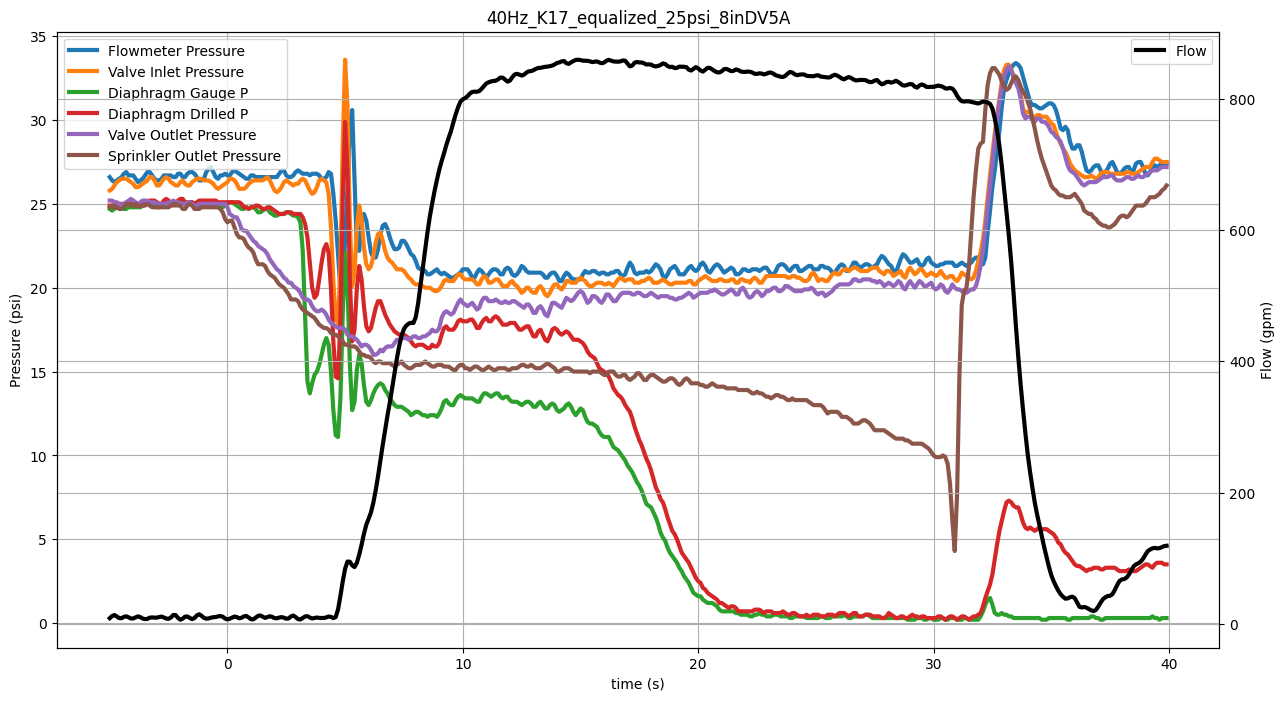

In [61]:
# 40Hz_K17_equalized_25psi_8inDV5A
filename = '40Hz_K17_equalized_25psi_8inDV5A'
first = 650
last = 1100
start = 70
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Gauge P','Diaphragm Drilled P','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

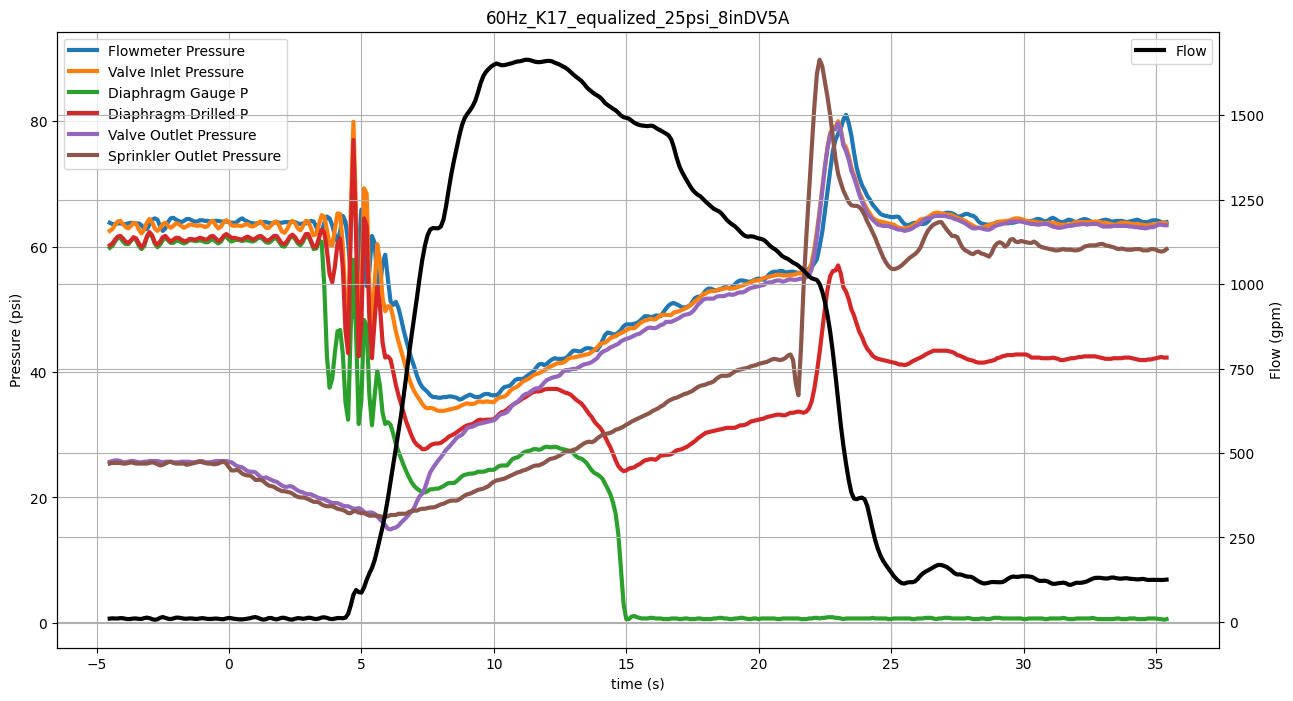

In [62]:
# 60Hz_K17_equalized_25psi_8inDV5A
filename = '60Hz_K17_equalized_25psi_8inDV5A'
first = 700
last = 1100
start = 74.5
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Gauge P','Diaphragm Drilled P','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

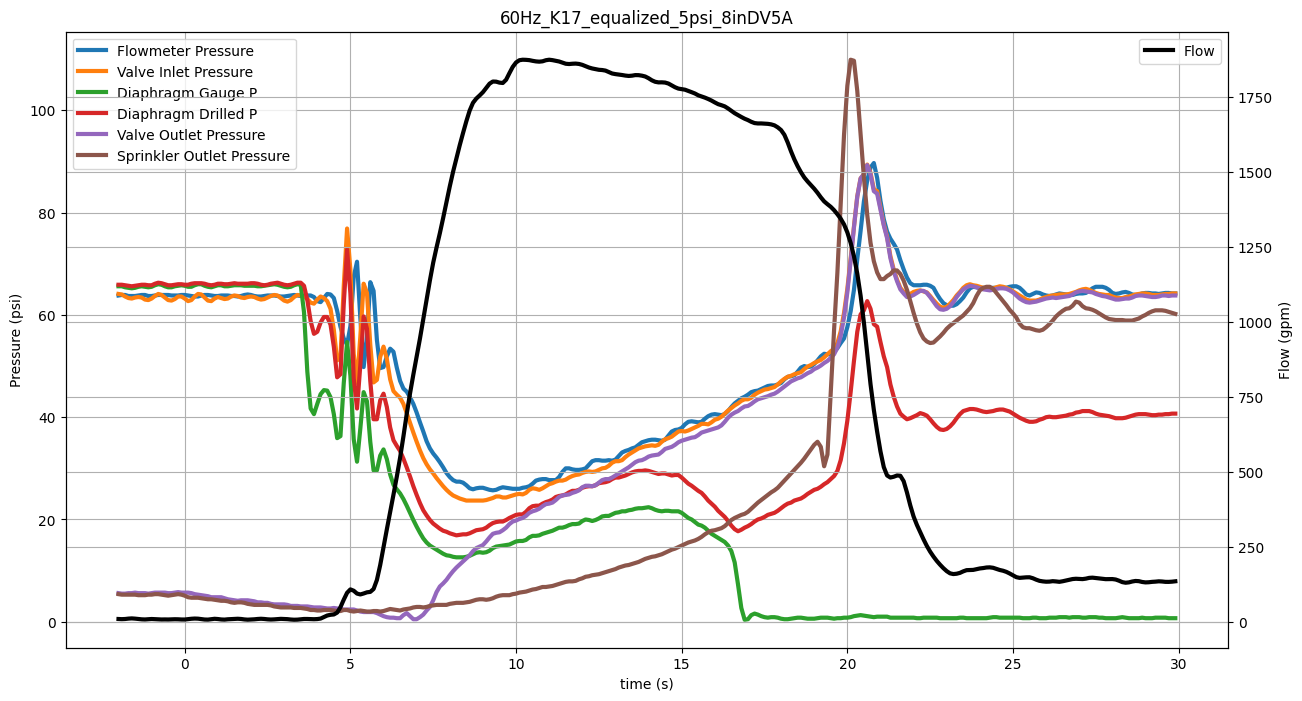

In [63]:
# 60Hz_K17_equalized_5psi_8inDV5A
filename = '60Hz_K17_equalized_5psi_8inDV5A'
first = 530
last = 850
start = 55
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Gauge P','Diaphragm Drilled P','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

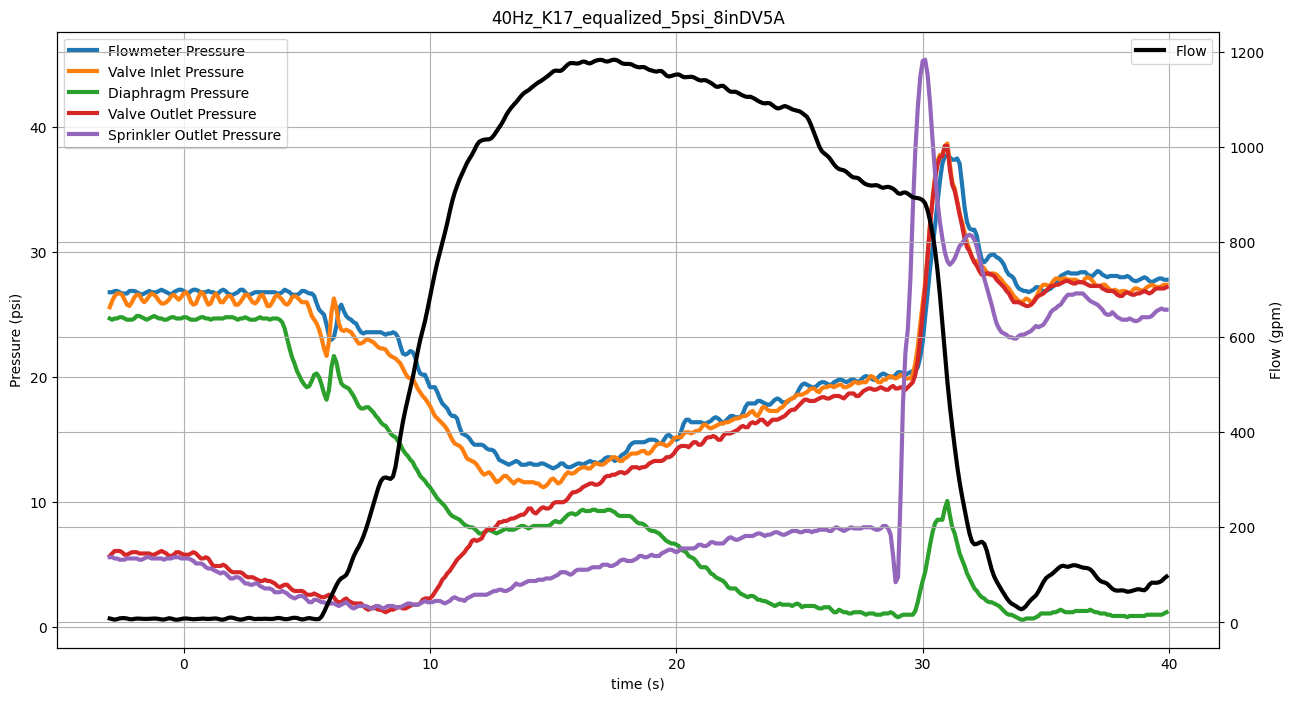

In [64]:
# 40Hz_K17_equalized_5psi_8inDV5A
filename = '40Hz_K17_equalized_5psi_8inDV5A'
first = 220
last = 650
start = 25
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Pressure','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter Flowrate'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

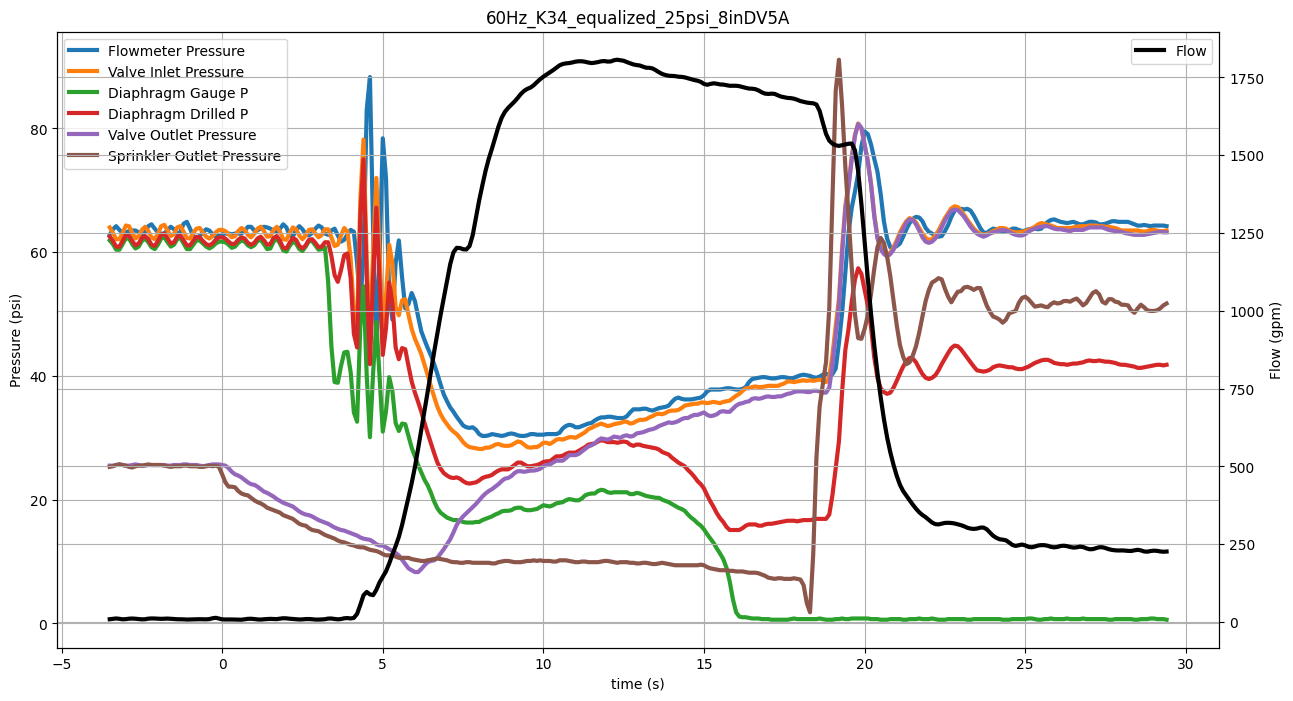

In [65]:
# 60Hz_K34_equalized_25psi_8inDV5A
filename = '60Hz_K34_equalized_25psi_8inDV5A'
first = 270
last = 600
start = 30.5
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Gauge P','Diaphragm Drilled P','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

In [66]:
# 40Hz_K17_plus50psi_25psi_8inDV5A
filename = '40Hz_K17_plus50psi_25psi_8inDV5A'
first = 250
last = 700
start = 30
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Diaphragm Gauge P','Diaphragm Drilled P','Valve Outlet Pressure','Sprinkler Outlet Pressure']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flowmeter'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '40Hz_K17_plus50psi_25psi_8inDV5A.csv'

## 6in DPV1

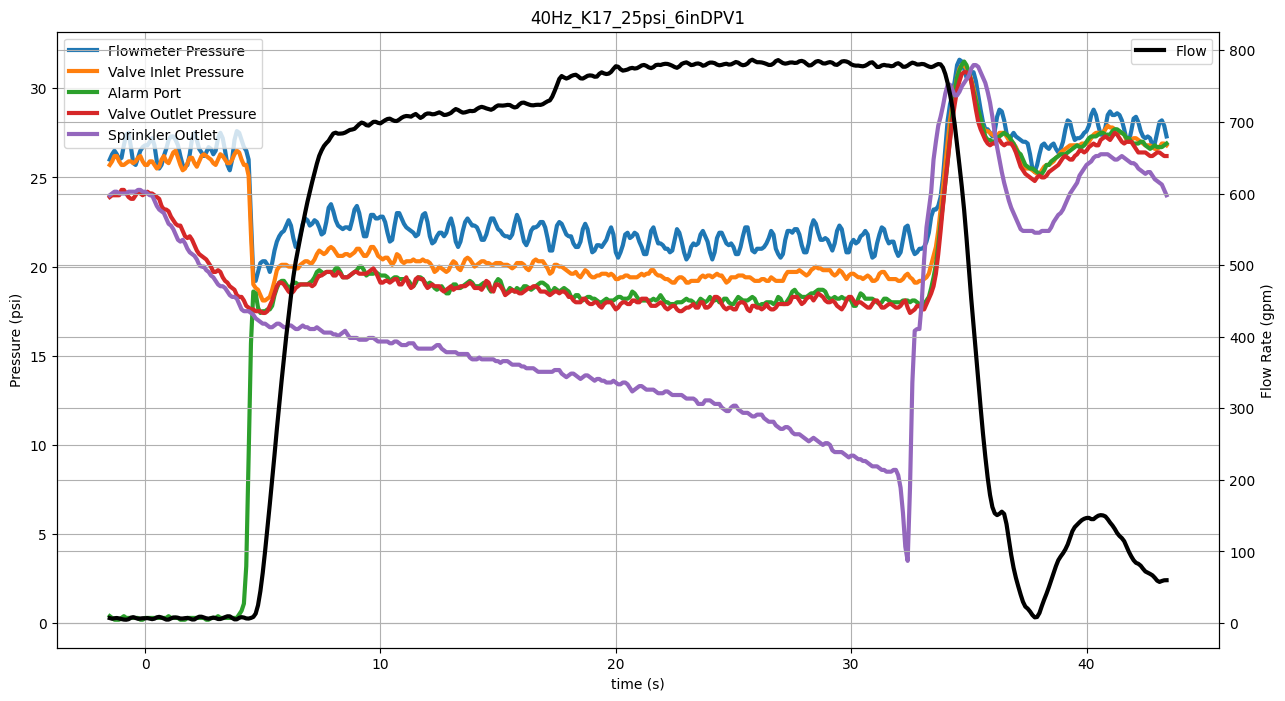

In [67]:
# 40Hz_K17_25psi_6inDPV1
filename = '40Hz_K17_25psi_6inDPV1'
first = 200
last = 650
start = 21.5
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Alarm Port','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow Rate (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flow Rate (gpm)'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')

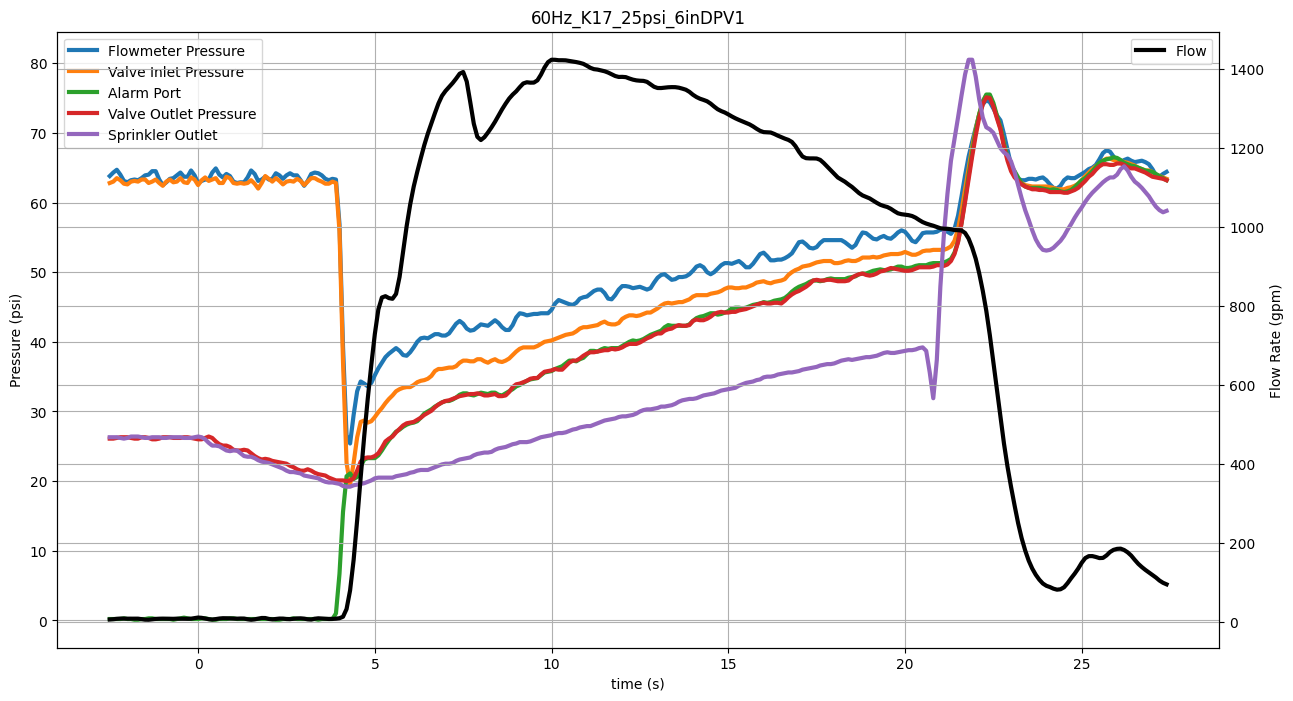

In [68]:
# 60Hz_K17_25psi_6inDPV1
filename = '60Hz_K17_25psi_6inDPV1'
first = 150
last = 450
start = 17.5
df5 = pd.read_csv(filename + '.csv')
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (psi)')
for i in ['Flowmeter Pressure','Valve Inlet Pressure','Alarm Port','Valve Outlet Pressure','Sprinkler Outlet']:
    ax1.plot(df5['t'][first:last]-start, df5[i][first:last],label = i, linewidth = 3)
ax1.tick_params(axis='y')

plt.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Flow Rate (gpm)')  # we already handled the x-label with ax1
ax2.plot(df5['t'][first:last]-start, df5['Flow Rate (gpm)'][first:last], label = 'Flow', linewidth = 3, color ='black')
ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title(filename)
plt.grid()
plt.show()
fig.savefig(filename+".pdf", bbox_inches='tight')